# torch和numpy的关系

In [20]:
import torch
import numpy as np

In [ ]:
torch.cuda.is_available()

In [12]:
np_data = numpy.arange(6).reshape((2,3))

torch_data = torch.from_numpy(np_data)
np_data, torch_data.float()

(array([[0, 1, 2],
        [3, 4, 5]]), tensor([[0., 1., 2.],
         [3., 4., 5.]]))

In [17]:
c = torch_data.numpy()

c

array([[0, 1, 2],
       [3, 4, 5]])

# 基本运算 

In [88]:
data = np.array([-1,-2,3,4])
tensor = torch.FloatTensor(data)   # 转换为torch.float32 的数据格式
tensor.type()

'torch.FloatTensor'

In [50]:
# http://pytorch.org/docs/torch.html#math-operations

tensor加减乘除

In [51]:
print(np.abs(data),torch.abs(tensor), abs(tensor), tensor.exp_(), tensor.mul(-1), tensor.abs_(), tensor)   
# 注意所有的torch运算都可以在后面加上“_”，即：torch.abs_(tensor) 或者tensor.abs_(), 这样就可以实现变量的改变而不仅仅是输出结果，多了一层赋值效果

[1 2 3 4] tensor([1., 2., 3., 4.]) tensor([1., 2., 3., 4.]) tensor([ 0.3679,  0.1353, 20.0855, 54.5981]) tensor([ -0.3679,  -0.1353, -20.0855, -54.5981]) tensor([ 0.3679,  0.1353, 20.0855, 54.5981]) tensor([ 0.3679,  0.1353, 20.0855, 54.5981])


In [57]:
data.astype(np.float32)  # torch没有astype!!!

array([-1., -2.,  3.,  4.], dtype=float32)

In [68]:
from torch.autograd import Variable

In [124]:
tensor=Variable(tensor, requires_grad = True)
# tensor.requires_grad = True
# tensor.requires_grad = False
tensor.requires_grad
print(tensor.type())

torch.FloatTensor


In [125]:
tensor

tensor([-0.6784, -0.7097,  0.1402, -0.6339], requires_grad=True)

In [126]:
tensor = tensor.detach_()   # 将tensor从动态图里拿下来， 并且将requires_grad = False
tensor.requires_grad = True  # 可以重新将其grad激活
print(tensor.type())

torch.FloatTensor


In [127]:
tensor

tensor([-0.6784, -0.7097,  0.1402, -0.6339], requires_grad=True)

In [128]:
# torch.sin(tensor)

In [196]:
torch.sin_(tensor.detach_())

True

In [133]:
tensor

tensor([-0.5872, -0.6065,  0.1393, -0.5583])

In [136]:
tensor2 = torch.Tensor(data)   #  默认float  : torch.FlaotTensor, torch.IntTensor()

In [146]:
data.shape[0], tensor2.type(), type(tensor2)

(4, 'torch.FloatTensor', torch.Tensor)

矩阵乘积

In [201]:
np_data = np.array([[1,2],[3,4]])
tensor_data = torch.from_numpy(np_data)
print(tensor_data.data)

tensor([[1, 2],
        [3, 4]], dtype=torch.int32)


In [167]:
torch.mm(tensor_data,tensor_data), np.matmul(np_data,np_data), np_data.dot(np_data), np_data*np_data

(tensor([[ 7, 10],
         [15, 22]], dtype=torch.int32), array([[ 7, 10],
        [15, 22]]), array([[ 7, 10],
        [15, 22]]), array([[ 1,  4],
        [ 9, 16]]))

点乘

In [168]:
tensor_data*tensor_data, np_data*np_data

(tensor([[ 1,  4],
         [ 9, 16]], dtype=torch.int32), array([[ 1,  4],
        [ 9, 16]]))

In [192]:
tensor_data_flatten = tensor_data.reshape(4,1).squeeze()
tensor_data_flatten.shape

torch.Size([4])

In [193]:
tensor_data_flatten.dot(tensor_data_flatten)        
# 注意： 新版的torch的dot点乘只能用一维数据：[n] ！！！之前reshape或者view后要经过一次squeeze操作

tensor(30, dtype=torch.int32)

# Variable

In [ ]:
from torch.autograd import Variable

In [202]:
tensor = torch.from_numpy(np.array([1,2,3,4]))

In [203]:
tensor

tensor([1, 2, 3, 4], dtype=torch.int32)

In [206]:
tensor = Variable(tensor)

In [210]:
print(tensor)

tensor([1, 2, 3, 4], dtype=torch.int32)


In [208]:
tensor.requires_grad

False

In [209]:
tensor.data

tensor([1, 2, 3, 4], dtype=torch.int32)

# activation

In [213]:
import torch
import torch.nn.functional as F
from torch.autograd import Variable
import matplotlib.pyplot as plt

In [224]:
x = torch.linspace(-10,10,200)
x = Variable(x)
x_np = x.data.numpy()  # plt 不能用tensor

In [228]:
y_relu = torch.relu(x).data.numpy()   # 新版本的激活函数都放在了torch里，当然也支持torch.nn.functional 的库
y_softplus = F.softplus(x).data.numpy()   # 不同于softmax, softplus为：log(1+exp(x))，其实就是relu的平滑版本。softmax： exp(x_i)/\sum_1~N(exp(x_i))
y_tanh = F.tanh(x).data.numpy()
y_sig = F.sigmoid(x).data.numpy()

G:\acanoda\lib\site-packages\torch\nn\functional.py:1374: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
G:\acanoda\lib\site-packages\torch\nn\functional.py:1386: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


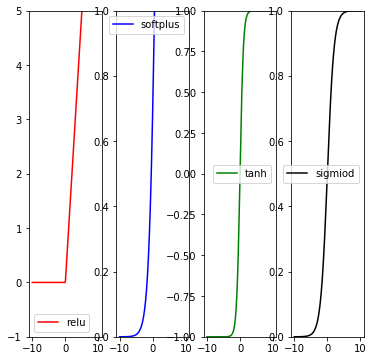

In [229]:
fig = plt.figure(1, figsize= (6,6))
plt.subplot(141)
plt.plot(x_np, y_relu, c='red', label = 'relu')
plt.ylim((-1,5))
# plt.xlim((-10,10))
plt.legend(loc='best')

fig = plt.figure(1, figsize= (6,6))
plt.subplot(142)
plt.plot(x_np, y_softplus, c='blue', label = 'softplus')
plt.ylim((0,1))
# plt.xlim((-10,10))
plt.legend(loc='best')

fig = plt.figure(1, figsize= (6,6))
plt.subplot(143)
plt.plot(x_np, y_tanh, c='green', label = 'tanh')
plt.ylim((-1,1))
# plt.xlim((-10,10))
plt.legend(loc='best')

fig = plt.figure(1, figsize= (6,6))
plt.subplot(144)
plt.plot(x_np, y_sig, c='black', label = 'sigmiod')
plt.ylim((0,1))
# plt.xlim((-10,10))
plt.legend(loc='best')
plt.show()

# Variable

In [ ]:
'''
新版的torch1.0以上
variable就被舍弃了！！！
woc!对啊！为啥要variable呢
直接tensor就行了啊
虽然现在it is sitll works
but
没必要啊！

'''

In [339]:
import torch
import torch.nn as nn
from torch.autograd import Variable

In [343]:
import torch
from torch.autograd import  Variable
import numpy as np
a = np.array([[1.,2.],[3.,4.]])
'''
torch里面只有float数据才可以求导！！！！，所以任何变量值必须是浮点型
'''
aa = torch.tensor(a, requires_grad =True) # 注意，用这个biubiu要求数据为float
aaa = torch.Tensor(a)
# aaa.requires_grad_()  # 这个也可以将grad激活
aaa.requires_grad=True
b = torch.FloatTensor([[1,2],[3,4]])
c = Variable(b, requires_grad = True)
# print(aa)
# print(aaa)
# print(b)
# print(c)

tensor([[1., 2.],
        [3., 4.]], dtype=torch.float64, requires_grad=True)
tensor([[1., 2.],
        [3., 4.]], requires_grad=True)
tensor([[1., 2.],
        [3., 4.]])
tensor([[1., 2.],
        [3., 4.]], requires_grad=True)


In [344]:
t_out = torch.mean(b*b)
v_out = torch.mean(c*c)

v_out.backward()
print(c.grad)

tensor([[0.5000, 1.0000],
        [1.5000, 2.0000]])


In [345]:
v_out.data

tensor(7.5000)

In [346]:
c

tensor([[1., 2.],
        [3., 4.]], requires_grad=True)

In [347]:
c.data

tensor([[1., 2.],
        [3., 4.]])

# 回归模型（regression）

In [316]:
import torch
import torch.nn.functional as F
import numpy 
import torch.nn as nn
from torch import optim
import matplotlib.pyplot as plt
from torch.autograd import Variable

In [317]:
x = torch.linspace(-1,1,100)
x = x.reshape(len(x),1)  # 变成2维度[[...]], torch里面只能处理至少两维的数
# x = torch.unsqueeze(x,dim=1)  # 这个也可以多一个维度
# x

In [318]:
y = x.pow(2) + 0.2*torch.rand(x.size())  #加上一些噪声
x, y = Variable(x), Variable(y)

In [319]:
# x,y

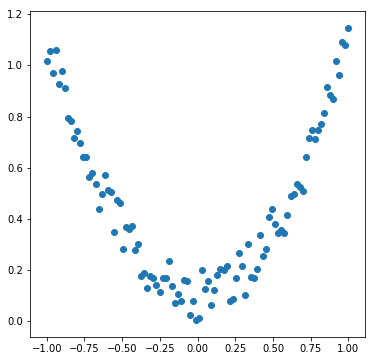

In [320]:
fig = plt.figure(1, figsize=(6,6))
plt.scatter(x.data.numpy(), y.data.numpy())
plt.show()

In [327]:
class Net(nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net,self).__init__()
        self.hidden = nn.Linear(n_feature, n_hidden)
        self.predict = nn.Linear(n_hidden, n_output)
        
    def forward(self,x):
        x = F.relu(self.hidden(x))
        x = self.predict(x)
        return x

net = Net(1, 10, 1)
if torch.cuda.is_available():
    net.cuda()
print(net)
def init_weight(m):
    if type(m) == nn.Linear:
        nn.init.xavier_uniform_(m.weight)
        m.bias.data.fill_(0.01)
net.apply(init_weight)

Net(
  (hidden): Linear(in_features=1, out_features=10, bias=True)
  (predict): Linear(in_features=10, out_features=1, bias=True)
)


Net(
  (hidden): Linear(in_features=1, out_features=10, bias=True)
  (predict): Linear(in_features=10, out_features=1, bias=True)
)

In [328]:
optimizer = optim.SGD(net.parameters(), lr = 0.2)
loss = nn.MSELoss()

epoch:0,	 loss:0.041035208851099014


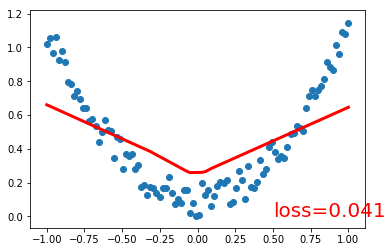

epoch:1,	 loss:0.04095494747161865
epoch:2,	 loss:0.04087437689304352
epoch:3,	 loss:0.04079398140311241
epoch:4,	 loss:0.040713775902986526
epoch:5,	 loss:0.04063376411795616


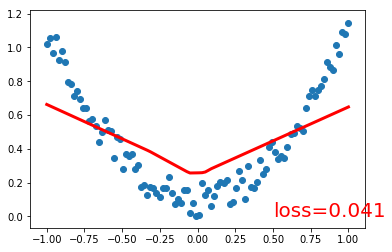

epoch:6,	 loss:0.04055393114686012
epoch:7,	 loss:0.04047427326440811
epoch:8,	 loss:0.04039481282234192
epoch:9,	 loss:0.04031553119421005
epoch:10,	 loss:0.04023643583059311


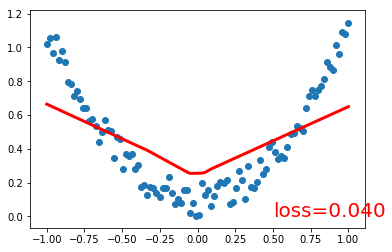

epoch:11,	 loss:0.040157511830329895
epoch:12,	 loss:0.0400787778198719
epoch:13,	 loss:0.04000023007392883
epoch:14,	 loss:0.03992172330617905
epoch:15,	 loss:0.03984226658940315


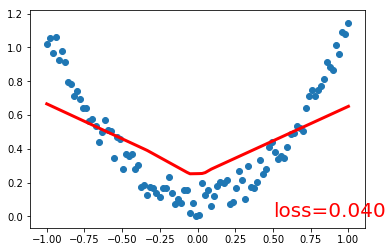

epoch:16,	 loss:0.03976299241185188
epoch:17,	 loss:0.039684005081653595
epoch:18,	 loss:0.03960539028048515
epoch:19,	 loss:0.03952696919441223
epoch:20,	 loss:0.03944872319698334


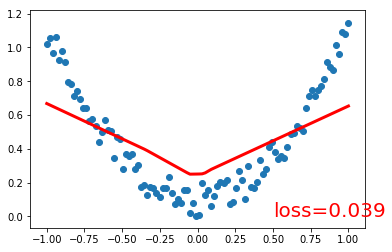

epoch:21,	 loss:0.039370667189359665
epoch:22,	 loss:0.03929278999567032
epoch:23,	 loss:0.039215099066495895
epoch:24,	 loss:0.0391375869512558
epoch:25,	 loss:0.03906026482582092


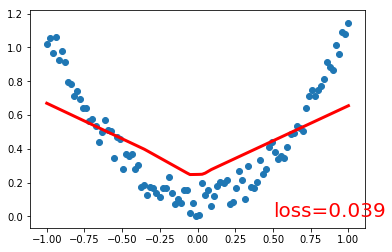

epoch:26,	 loss:0.038983117789030075
epoch:27,	 loss:0.03890565037727356
epoch:28,	 loss:0.03882775455713272
epoch:29,	 loss:0.038750048726797104
epoch:30,	 loss:0.03867252916097641


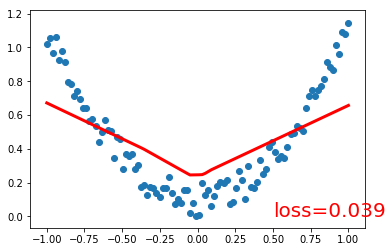

epoch:31,	 loss:0.03859519585967064
epoch:32,	 loss:0.03851804882287979
epoch:33,	 loss:0.03844107687473297
epoch:34,	 loss:0.03836416080594063
epoch:35,	 loss:0.03828742355108261


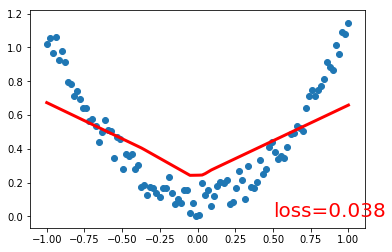

epoch:36,	 loss:0.038211144506931305
epoch:37,	 loss:0.03813530504703522
epoch:38,	 loss:0.038059260696172714
epoch:39,	 loss:0.037982482463121414
epoch:40,	 loss:0.037905894219875336


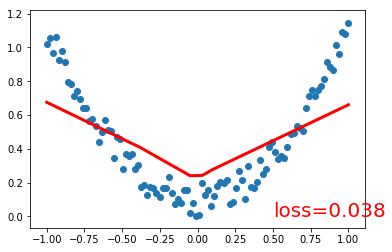

epoch:41,	 loss:0.03782949596643448
epoch:42,	 loss:0.037753280252218246
epoch:43,	 loss:0.037677258253097534
epoch:44,	 loss:0.03760142996907234
epoch:45,	 loss:0.03752584755420685


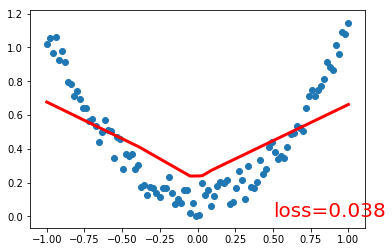

epoch:46,	 loss:0.03745054826140404
epoch:47,	 loss:0.03737543523311615
epoch:48,	 loss:0.03730042278766632
epoch:49,	 loss:0.03722501918673515
epoch:50,	 loss:0.03714979812502861


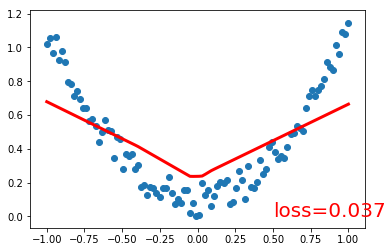

epoch:51,	 loss:0.03707476332783699
epoch:52,	 loss:0.036999911069869995
epoch:53,	 loss:0.03692524507641792
epoch:54,	 loss:0.036850765347480774
epoch:55,	 loss:0.03677647188305855


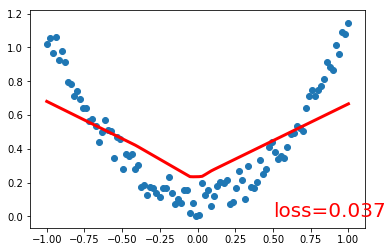

epoch:56,	 loss:0.03670235723257065
epoch:57,	 loss:0.03662842884659767
epoch:58,	 loss:0.03655451163649559
epoch:59,	 loss:0.03648006543517113
epoch:60,	 loss:0.03640580549836159


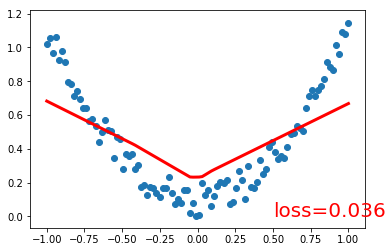

epoch:61,	 loss:0.03633172810077667
epoch:62,	 loss:0.03625784441828728
epoch:63,	 loss:0.03618413954973221
epoch:64,	 loss:0.03611062467098236
epoch:65,	 loss:0.03603728860616684


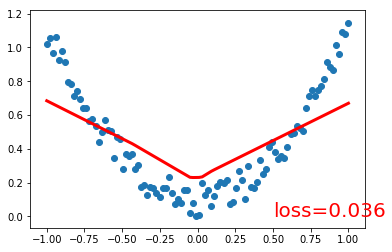

epoch:66,	 loss:0.03596413508057594
epoch:67,	 loss:0.035891175270080566
epoch:68,	 loss:0.03581806644797325
epoch:69,	 loss:0.03574514389038086
epoch:70,	 loss:0.03567241132259369


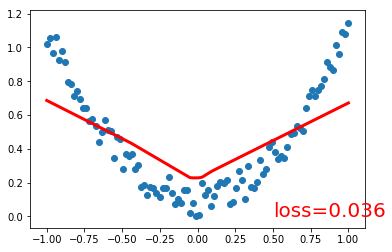

epoch:71,	 loss:0.03559985011816025
epoch:72,	 loss:0.03552747145295143
epoch:73,	 loss:0.035455282777547836
epoch:74,	 loss:0.03538326919078827
epoch:75,	 loss:0.035311438143253326


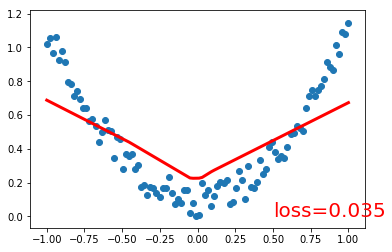

epoch:76,	 loss:0.03523978590965271
epoch:77,	 loss:0.03516779839992523
epoch:78,	 loss:0.03509598970413208
epoch:79,	 loss:0.03502436727285385
epoch:80,	 loss:0.034952931106090546


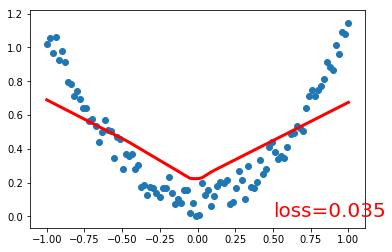

epoch:81,	 loss:0.034881673753261566
epoch:82,	 loss:0.034810587763786316
epoch:83,	 loss:0.03473969176411629
epoch:84,	 loss:0.034668970853090286
epoch:85,	 loss:0.03459836170077324


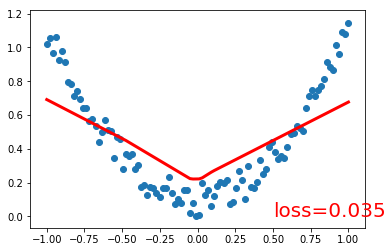

epoch:86,	 loss:0.034527476876974106
epoch:87,	 loss:0.0344567745923996
epoch:88,	 loss:0.03438625857234001
epoch:89,	 loss:0.034315917640924454
epoch:90,	 loss:0.03424575924873352


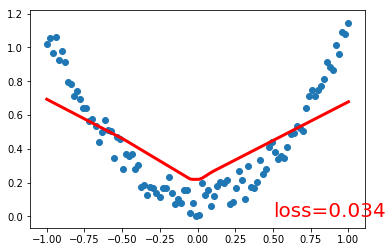

epoch:91,	 loss:0.03417578339576721
epoch:92,	 loss:0.03410598263144493
epoch:93,	 loss:0.034036364406347275
epoch:94,	 loss:0.033966418355703354
epoch:95,	 loss:0.03389594331383705


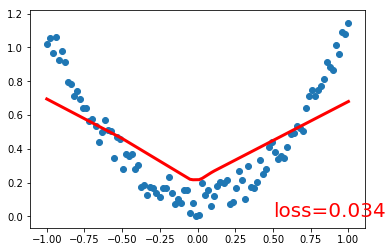

epoch:96,	 loss:0.033825650811195374
epoch:97,	 loss:0.03375553712248802
epoch:98,	 loss:0.03368561714887619
epoch:99,	 loss:0.033615872263908386


In [338]:
plt.ion()  # 实时打印
plt.show()

for epoch in range(100):
    losses = 0
    if torch.cuda.is_available():
        x = x.cuda()
        y = y.cuda()
    optimizer.zero_grad()
    prediction = net(x)
    losses = loss(prediction, y)
    losses.backward()
    optimizer.step()
    print("epoch:{},\t loss:{}".format(epoch, losses))
    if epoch%5==0:
#         plt.cla()
        plt.scatter(x.cpu().data.numpy(),y.cpu().data.numpy())
        plt.plot(x.cpu().data.numpy(), prediction.cpu().data.numpy(),'r-',lw=3)
        plt.text(0.5,0,'loss=%.3f'% losses, fontdict={'size':20,'color': 'red'})
        plt.pause(1)

plt.ioff()
plt.show()

# 分类模型

In [135]:
import torch as t
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
from torch import optim

G:\acanoda\lib\site-packages\ipykernel_launcher.py:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  if __name__ == '__main__':
G:\acanoda\lib\site-packages\ipykernel_launcher.py:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  # Remove the CWD from sys.path while we load stuff.


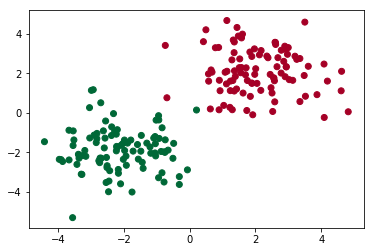

In [142]:
n_data = t.ones(100,2)
x0 = t.normal(2*n_data, 1)
y0 = t.zeros(100)
x1 = t.normal(-2*n_data, 1)
y1 = t.ones(100)

x = t.cat((x0,x1), dim=0).type(t.FloatTensor)
y = t.cat((y0,y1), dim=0).type(t.FloatTensor)
x = t.tensor(x,requires_grad = True).cuda()
y = t.tensor(y, requires_grad = False).long().cuda()

fig = plt.figure()
plt.scatter(x.cpu().data.numpy()[:, 0], 
            x.cpu().data.numpy()[:, 1], 
            c=y.cpu().data.numpy(),
            cmap='RdYlGn')
plt.show()
# t.normal(mean, std, out=None)
# t.normal 的shape满足mean和std的维度，
# 这两者都必须是张量或者一个常数共享。

In [207]:
class Net(nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net,self).__init__()
        self.hidden = nn.Linear(n_feature, n_hidden)
        self.predict = nn.Linear(n_hidden, n_output)
        
    def forward(self,x):
        x = t.relu(self.hidden(x))
        x = self.predict(x)
        x = t.softmax(x,dim=1)
        return x

net = Net(2, 10, 2)
if t.cuda.is_available():
    net.cuda()
print(net)
# def init_weight(m):
#     if type(m) == nn.Linear:
#         nn.init.xavier_uniform_(m.weight)
#         m.bias.data.fill_(0.01)
# net.apply(init_weight)

Net(
  (hidden): Linear(in_features=2, out_features=10, bias=True)
  (predict): Linear(in_features=10, out_features=2, bias=True)
)


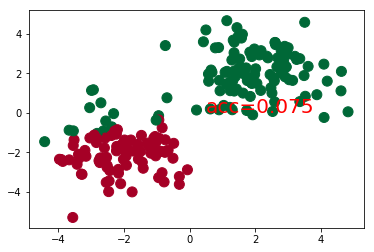

epoch:0,	 loss:0.9078642129898071


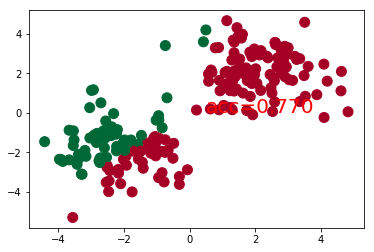

epoch:5,	 loss:0.5660189986228943


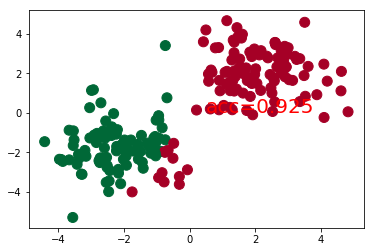

epoch:10,	 loss:0.450566828250885


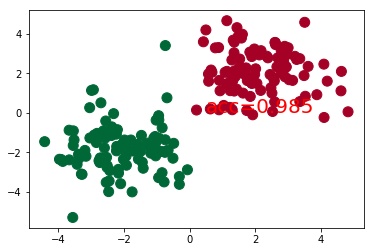

epoch:15,	 loss:0.40506237745285034


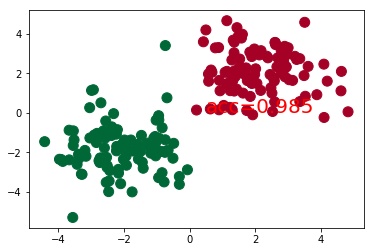

epoch:20,	 loss:0.3826509118080139


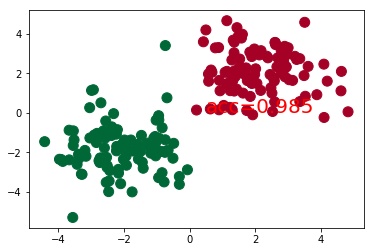

epoch:25,	 loss:0.36952725052833557


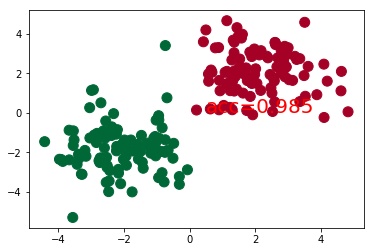

epoch:30,	 loss:0.36043983697891235


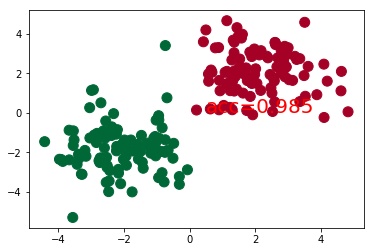

epoch:35,	 loss:0.35404065251350403


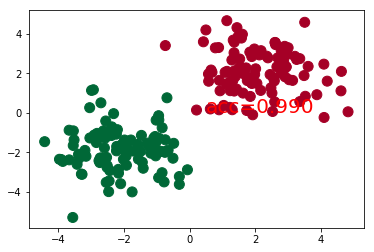

epoch:40,	 loss:0.34932371973991394


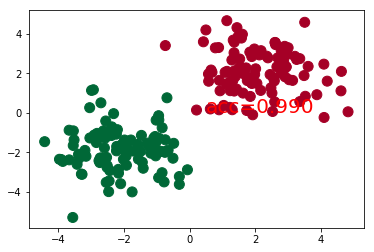

epoch:45,	 loss:0.3457171320915222


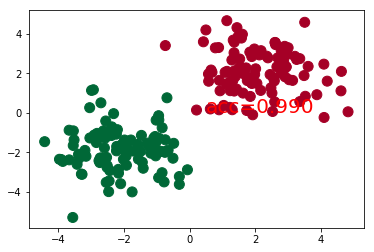

epoch:50,	 loss:0.34286966919898987


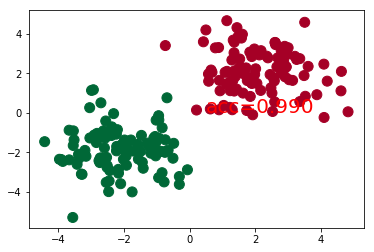

epoch:55,	 loss:0.3405798375606537


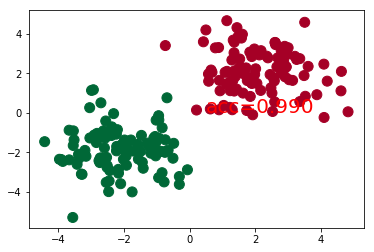

epoch:60,	 loss:0.3386974036693573


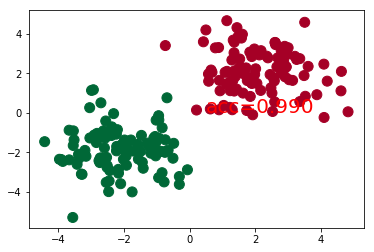

epoch:65,	 loss:0.33711886405944824


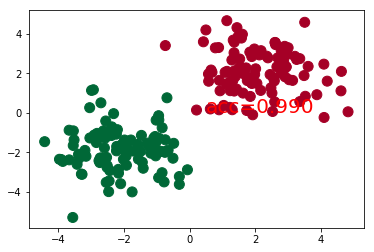

epoch:70,	 loss:0.33577781915664673


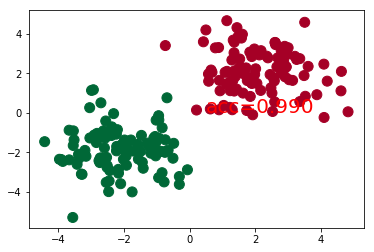

epoch:75,	 loss:0.33462807536125183


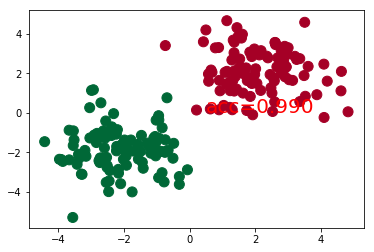

epoch:80,	 loss:0.33363163471221924


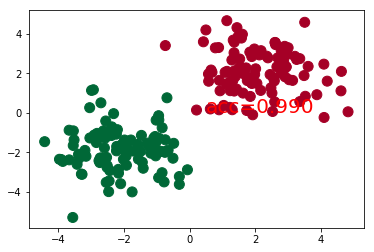

epoch:85,	 loss:0.33275917172431946


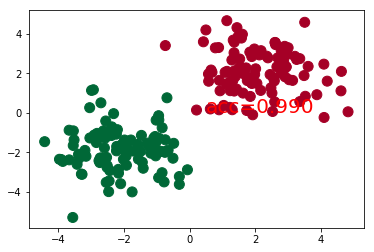

epoch:90,	 loss:0.3319801390171051


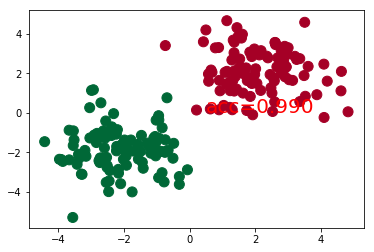

epoch:95,	 loss:0.33128821849823


In [167]:
optimizer = optim.SGD(net.parameters(), lr = 0.1)
loss_function = nn.CrossEntropyLoss()
plt.ion()  # 实时打印
plt.show()
# target = y.clone().cpu().data.numpy().copy()
for epoch in range(100):
    losses = 0
    optimizer.zero_grad()
    out = net(x)
    losses = loss_function(out, y)
    losses.backward()
    optimizer.step()
    
    if epoch%5==0:
        plt.cla()
        prediction = out.argmax(dim=1)
        prediction =  prediction.cpu().data.numpy()
        plt.scatter(x.cpu().data.numpy()[:,0],
                    x.cpu().data.numpy()[:,1],
                    c = prediction,
                    s =100, cmap = 'RdYlGn')
        acc = np.sum(prediction == y.cpu().data.numpy()) / 200
        plt.text(0.5,0,'acc=%.3f'% acc, fontdict={'size':20,'color': 'red'})
        plt.pause(1)
        print("epoch:{},\t loss:{}".format(epoch, losses))
   

plt.ioff()
plt.show()

# 快速搭建nn

In [182]:
import torch as torch
import torch.nn as nn
from torch import optim
import numpy as np
import matplotlib.pyplot as plt

In [190]:
net2 = nn.Sequential(
      nn.Linear(2,10),
      nn.ReLU(),  # 这里用大写，表示是nn的层类，也会被认为是网络层。但之前的F.relu只是表示一个函数接口对上一层数据做处理
      nn.Linear(10,2)
)

# 初始化

sequeential 初始化1

In [196]:
for layers in net2:   
    if type(layers) == nn.Linear: 
#         print(layers)
#           1：
        nn.init.xavier_uniform_(layers.weight)
#         print(layers.weight)
#           2：
        layers.weight.data.fill_(0.1)
#           3：
        layers.weight.data = 0.2 * torch.from_numpy(np.ones_like(layers.weight.detach()))
#         
#         print(layers.weight)

sequeential 初始化2

In [218]:
def weight(layers) :
    if type(layers) == nn.Linear: 
        print(layers)
#           1：
        nn.init.xavier_uniform_(layers.weight)
#         print(layers.weight)
#           2：
        layers.weight.data.fill_(0.1)
#           3：
        layers.weight.data = 0.2 * torch.from_numpy(np.ones_like(layers.weight.detach()))
#         
#         print(layers.weight)
net2.apply(weight)

Linear(in_features=2, out_features=10, bias=True)
Linear(in_features=10, out_features=2, bias=True)


Sequential(
  (0): Linear(in_features=2, out_features=10, bias=True)
  (1): ReLU()
  (2): Linear(in_features=10, out_features=2, bias=True)
)

module模型类型初始化1

In [212]:
for layer in net.modules():
    if isinstance(layer, nn.Linear):
        print(layer)
        layer.weight.data.fill_(0.01)
        print(layer.weight)

Linear(in_features=2, out_features=10, bias=True)
Parameter containing:
tensor([[0.0100, 0.0100],
        [0.0100, 0.0100],
        [0.0100, 0.0100],
        [0.0100, 0.0100],
        [0.0100, 0.0100],
        [0.0100, 0.0100],
        [0.0100, 0.0100],
        [0.0100, 0.0100],
        [0.0100, 0.0100],
        [0.0100, 0.0100]], device='cuda:0', requires_grad=True)
Linear(in_features=10, out_features=2, bias=True)
Parameter containing:
tensor([[0.0100, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100,
         0.0100],
        [0.0100, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100,
         0.0100]], device='cuda:0', requires_grad=True)


module初始化2

In [214]:
def weight2(layer):
    if isinstance(layer, nn.Linear):
        print(layer)
        layer.weight.data.fill_(0.01)
        print(layer.weight)
net.apply(weight2)

Linear(in_features=2, out_features=10, bias=True)
Parameter containing:
tensor([[0.0100, 0.0100],
        [0.0100, 0.0100],
        [0.0100, 0.0100],
        [0.0100, 0.0100],
        [0.0100, 0.0100],
        [0.0100, 0.0100],
        [0.0100, 0.0100],
        [0.0100, 0.0100],
        [0.0100, 0.0100],
        [0.0100, 0.0100]], device='cuda:0', requires_grad=True)
Linear(in_features=10, out_features=2, bias=True)
Parameter containing:
tensor([[0.0100, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100,
         0.0100],
        [0.0100, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100,
         0.0100]], device='cuda:0', requires_grad=True)


Net(
  (hidden): Linear(in_features=2, out_features=10, bias=True)
  (predict): Linear(in_features=10, out_features=2, bias=True)
)

总结：

不管是squeential模型还是module， 两者都可以实行 layer in net的操作；
但是对于module模型，必须要是 layer in net.moduls()
然后逐一进行赋值

# 网络保存和提取

In [220]:
import torch as torch
import torch.nn as nn
from torch import optim
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def my_nn():

    net3 = nn.Sequential(
      nn.Linear(2,10),
      nn.ReLU(),  # 这里用大写，表示是nn的层类，也会被认为是网络层。但之前的F.relu只是表示一个函数接口对上一层数据做处理
      nn.Linear(10,2)
      )
    optimizer = optim.SGD(net3.parameters(),lr=0.2)
    loss_func = nn.MSELoss()
    
    for epoch in range(100):
        prediction = net3(x)
        loss = loss_func(out, y)
        optimizer.zero_grad()
        optimizer.step()
    
    torch.save(net3, 'net3.pkl')  # 保存网络结构以及权重参数
    torch.save(net3.state_dict(), 'net3_dict.pkl')       # 只保存权重
def load():
    net3_load = torch.load('net3.pkl')
    net3 = nn.Sequential(
      nn.Linear(2,10),
      nn.ReLU(),  # 这里用大写，表示是nn的层类，也会被认为是网络层。但之前的F.relu只是表示一个函数接口对上一层数据做处理
      nn.Linear(10,2)
      )
    net3_load_dict = net3.load_state_dic(torch.load('net3_dict.pkl')) 
# 如果只用torch.load加载出来的其实就是一些参数而已，需要先将参数加载，然后再把结构加上
    return neyy3_load, net3_load_dict

# 批训练

In [245]:
import torch as torch
import torch.nn as nn
from torch import optim
import numpy as np
import matplotlib.pyplot as plt
import torch.utils.data as Data
from torch.utils.data import Dataset, DataLoader
import torchvision

In [246]:
batch_size = 9

x = torch.linspace(1,10,10)
y = torch.linspace(10,1,10)

torch_data  = Data.TensorDataset(x, y)
data_loader = DataLoader(dataset = torch_data,
                         shuffle = False,
                         num_workers = 2,
                         batch_size = batch_size)

for epoch in range(5):
    for batch_id, (batch_x, batch_y) in enumerate(data_loader):
        print("epoch:{}\t batch_id:{}\n x:{}\n y:{}\n".format(epoch,batch_id, batch_x, batch_y))

epoch:0	 batch_id:0
 x:tensor([1., 2., 3., 4., 5., 6., 7., 8., 9.])
 y:tensor([10.,  9.,  8.,  7.,  6.,  5.,  4.,  3.,  2.])

epoch:0	 batch_id:1
 x:tensor([10.])
 y:tensor([1.])

epoch:1	 batch_id:0
 x:tensor([1., 2., 3., 4., 5., 6., 7., 8., 9.])
 y:tensor([10.,  9.,  8.,  7.,  6.,  5.,  4.,  3.,  2.])

epoch:1	 batch_id:1
 x:tensor([10.])
 y:tensor([1.])

epoch:2	 batch_id:0
 x:tensor([1., 2., 3., 4., 5., 6., 7., 8., 9.])
 y:tensor([10.,  9.,  8.,  7.,  6.,  5.,  4.,  3.,  2.])

epoch:2	 batch_id:1
 x:tensor([10.])
 y:tensor([1.])

epoch:3	 batch_id:0
 x:tensor([1., 2., 3., 4., 5., 6., 7., 8., 9.])
 y:tensor([10.,  9.,  8.,  7.,  6.,  5.,  4.,  3.,  2.])

epoch:3	 batch_id:1
 x:tensor([10.])
 y:tensor([1.])

epoch:4	 batch_id:0
 x:tensor([1., 2., 3., 4., 5., 6., 7., 8., 9.])
 y:tensor([10.,  9.,  8.,  7.,  6.,  5.,  4.,  3.,  2.])

epoch:4	 batch_id:1
 x:tensor([10.])
 y:tensor([1.])



# 循环网
    

分类

In [1]:
import torch as torch
import torch.nn as nn
from torch import optim
import numpy as np
from torch.autograd import Variable
import matplotlib.pyplot as plt
import torch.utils.data as Data
from torch.utils.data import Dataset, DataLoader
from torchvision.datasets import MNIST
import torchvision.transforms as transforms

In [5]:
epoch = 1

batch_size = 64
t_step = 28
input_size = 28
lr_rate = 0.2

train_data = MNIST(root = './mnist', train=True,
                   transform = transforms.ToTensor(),
                  download=True)
data_loader = DataLoader(dataset = train_data,
                         shuffle = False,
                         num_workers = 2,
                         batch_size = batch_size)
test_data = MNIST(root = './mnist', train=False,
                   transform = transforms.ToTensor())
test_x = Variable(test_data.test_data, volatile = True).type(torch.FloatTensor)[:20]/255.
test_y = test_data.test_labels.numpy().squeeze()[:20]

G:\acanoda\lib\site-packages\torchvision\datasets\mnist.py:58: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
G:\acanoda\lib\site-packages\ipykernel_launcher.py:17: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
G:\acanoda\lib\site-packages\torchvision\datasets\mnist.py:48: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


In [9]:
class RNN(nn.Module):
    def __init__(self):
        super(RNN,self).__init__()
        
        self.rnn = nn.LSTM(
               input_size = input_size,
               hidden_size = 64,
               num_layers = 1,
               batch_first = True
        )   #batch_first – If True, 
            #then the input and output tensors are provided as (batch, seq, feature). Default: False
        self.linear1 = nn.Linear(64, 10)
    def forward(self,x):
        r_out, (h_n,c_n) = self.rnn(x, None)  # (batch_size, time_step, input_size)
        # 注意这里的顺序官网其实是time_step在最前面，
        #但是由于我们设置了batch_first=True,所以二者顺序换了一下
        # 这里的None表示h0的值。一般设为none表示0状态初始值。
        out = self.linear1(r_out[:,-1,:]) # 每一个step扫描一行图片像素
                                          # 最后一个step是我们的网络看完整张图片
                                          # 因此我们取这个结果为预测数据
        out = torch.softmax(out, dim = 1)
        return out

rnn = RNN().cuda()
print(rnn)

RNN(
  (rnn): LSTM(28, 64, batch_first=True)
  (linear1): Linear(in_features=64, out_features=10, bias=True)
)


In [10]:
optimizer = optim.Adam(rnn.parameters(), lr = 0.01)
loss_function = nn.CrossEntropyLoss()

# target = y.clone().cpu().data.numpy().copy()
for epoch in range(1):
 for batch_id, (x, y ) in enumerate(data_loader):
    batch_x = Variable(x.view(-1,28,28),requires_grad =True)
    batch_y = Variable(y)
    if torch.cuda.is_available():
        batch_x = batch_x.cuda()
        batch_y = batch_y.cuda()
        print("cuda")
    losses = 0
    optimizer.zero_grad()
    out = rnn(batch_x)
    losses = loss_function(out, batch_y)
    losses.backward()
    optimizer.step()
#     print("epoch:{},\t loss:{}".format(epoch, losses))
    if epoch%50==0:
        test_out = rnn(test_x.cuda())
        prediction = test_out.argmax(dim=1)
        prediction =  prediction.cpu().data.numpy()
#         print(prediction)
        acc = np.sum(prediction == test_y) / test_y.size

        print("epoch:{}  | loss:{}  | test acc:{}".format(epoch,losses, acc))

cuda
epoch:0  | loss:2.302664279937744  | test acc:0.05
cuda
epoch:0  | loss:2.3020007610321045  | test acc:0.05
cuda
epoch:0  | loss:2.302090644836426  | test acc:0.2
cuda
epoch:0  | loss:2.2973861694335938  | test acc:0.2
cuda
epoch:0  | loss:2.297529697418213  | test acc:0.2
cuda
epoch:0  | loss:2.2846999168395996  | test acc:0.15
cuda
epoch:0  | loss:2.282540798187256  | test acc:0.2
cuda
epoch:0  | loss:2.2423579692840576  | test acc:0.3
cuda
epoch:0  | loss:2.2673773765563965  | test acc:0.3
cuda
epoch:0  | loss:2.239164113998413  | test acc:0.3
cuda
epoch:0  | loss:2.235218048095703  | test acc:0.3
cuda
epoch:0  | loss:2.243230104446411  | test acc:0.3
cuda
epoch:0  | loss:2.274064064025879  | test acc:0.3
cuda
epoch:0  | loss:2.2063934803009033  | test acc:0.3
cuda
epoch:0  | loss:2.2148256301879883  | test acc:0.35
cuda
epoch:0  | loss:2.184112787246704  | test acc:0.35
cuda
epoch:0  | loss:2.178459882736206  | test acc:0.35
cuda
epoch:0  | loss:2.2116949558258057  | test acc:

epoch:0  | loss:1.8456320762634277  | test acc:0.65
cuda
epoch:0  | loss:1.8316166400909424  | test acc:0.7
cuda
epoch:0  | loss:1.7441580295562744  | test acc:0.7
cuda
epoch:0  | loss:1.7348790168762207  | test acc:0.7
cuda
epoch:0  | loss:1.74562668800354  | test acc:0.7
cuda
epoch:0  | loss:1.6912795305252075  | test acc:0.75
cuda
epoch:0  | loss:1.7489427328109741  | test acc:0.7
cuda
epoch:0  | loss:1.8178848028182983  | test acc:0.7
cuda
epoch:0  | loss:1.7928426265716553  | test acc:0.7
cuda
epoch:0  | loss:1.6618276834487915  | test acc:0.7
cuda
epoch:0  | loss:1.7192713022232056  | test acc:0.7
cuda
epoch:0  | loss:1.7206978797912598  | test acc:0.7
cuda
epoch:0  | loss:1.6875548362731934  | test acc:0.7
cuda
epoch:0  | loss:1.7636200189590454  | test acc:0.7
cuda
epoch:0  | loss:1.7624717950820923  | test acc:0.65
cuda
epoch:0  | loss:1.7366681098937988  | test acc:0.65
cuda
epoch:0  | loss:1.6741728782653809  | test acc:0.7
cuda
epoch:0  | loss:1.706850528717041  | test acc:

cuda
epoch:0  | loss:1.7116307020187378  | test acc:0.75
cuda
epoch:0  | loss:1.7799732685089111  | test acc:0.75
cuda
epoch:0  | loss:1.7732404470443726  | test acc:0.7
cuda
epoch:0  | loss:1.7888654470443726  | test acc:0.7
cuda
epoch:0  | loss:1.772517442703247  | test acc:0.7
cuda
epoch:0  | loss:1.7312296628952026  | test acc:0.8
cuda
epoch:0  | loss:1.6997227668762207  | test acc:0.8
cuda
epoch:0  | loss:1.7800849676132202  | test acc:0.8
cuda
epoch:0  | loss:1.7970396280288696  | test acc:0.8
cuda
epoch:0  | loss:1.7668452262878418  | test acc:0.8
cuda
epoch:0  | loss:1.7361352443695068  | test acc:0.85
cuda
epoch:0  | loss:1.6694231033325195  | test acc:0.8
cuda
epoch:0  | loss:1.687306523323059  | test acc:0.8
cuda
epoch:0  | loss:1.6227660179138184  | test acc:0.75
cuda
epoch:0  | loss:1.6519994735717773  | test acc:0.75
cuda
epoch:0  | loss:1.7254294157028198  | test acc:0.75
cuda
epoch:0  | loss:1.6780667304992676  | test acc:0.7
cuda
epoch:0  | loss:1.7616784572601318  | t

epoch:0  | loss:1.595583200454712  | test acc:0.9
cuda
epoch:0  | loss:1.6277165412902832  | test acc:0.9
cuda
epoch:0  | loss:1.5369586944580078  | test acc:0.9
cuda
epoch:0  | loss:1.4955590963363647  | test acc:0.9
cuda
epoch:0  | loss:1.5476034879684448  | test acc:0.9
cuda
epoch:0  | loss:1.6101033687591553  | test acc:0.9
cuda
epoch:0  | loss:1.7141978740692139  | test acc:0.9
cuda
epoch:0  | loss:1.5266629457473755  | test acc:0.9
cuda
epoch:0  | loss:1.57976496219635  | test acc:0.9
cuda
epoch:0  | loss:1.5560123920440674  | test acc:0.9
cuda
epoch:0  | loss:1.6578974723815918  | test acc:0.9
cuda
epoch:0  | loss:1.5397002696990967  | test acc:0.9
cuda
epoch:0  | loss:1.5437424182891846  | test acc:0.9
cuda
epoch:0  | loss:1.5841808319091797  | test acc:0.9
cuda
epoch:0  | loss:1.6269651651382446  | test acc:0.9
cuda
epoch:0  | loss:1.6185390949249268  | test acc:0.95
cuda
epoch:0  | loss:1.5736942291259766  | test acc:0.95
cuda
epoch:0  | loss:1.594308614730835  | test acc:0.9

In [11]:
test_out = rnn(test_x[:20].view(-1,28,28).cuda())
pred_y = test_out.argmax(dim=1).cpu().data.numpy()
print(pred_y)
print(test_y[:20])

[7 2 1 0 4 1 4 9 4 9 0 6 9 0 1 5 9 7 3 4]
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]


回归

In [57]:
import torch as torch
import torch.nn as nn
from torch import optim
import numpy as np
from torch.autograd import Variable
import matplotlib.pyplot as plt
import torch.utils.data as Data
from torch.utils.data import Dataset, DataLoader
from torchvision.datasets import MNIST
import torchvision.transforms as transforms

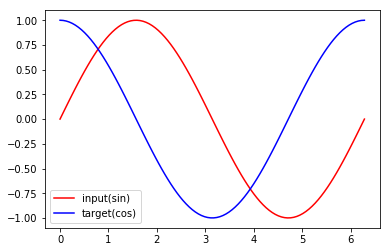

In [111]:
time_ = 10
input_size = 1
lr_rate = 0.1

steps = np.linspace(0, np.pi*2, 100, dtype = np.float32)
x_np = np.sin(steps)
y_np = np.cos(steps)

plt.plot(steps, x_np, 'r-', label = 'input(sin)')
plt.plot(steps, y_np, 'b-', label = 'target(cos)')
plt.legend(loc= 'best')
plt.show()

In [146]:
class RNN(nn.Module):
    def __init__(self):
        super(RNN,self).__init__()
        
        self.rnn = nn.LSTM(
            input_size = input_size,
            hidden_size = 32,
            num_layers = 1,
            batch_first = True) 
        self.linear1 = nn.Linear(32, 1)
    def forward(self, x, state):
        # r_out: (batch_size, time_step, output_size)
        # h_state: (num_layers, time_step, hidden_size)
        # x :      (batch_size, time_step, input_size)
        
        r_out, (h_state,c_state) = self.rnn(x, state )  # (batch_size, time_step, input_size)
        out = []
#         print(h_state)
#         print(h_state.shape)
#         print(r_out.shape)  # 1 10 32
#         for time_step in range(r_out.size(1)):
#           pass
#             out.append(self.linear1(r_out[:,time_step,:]))
# #             print(np.array(out))
#         print("stack",torch.stack(out, dim= 1).detach().cpu().data.numpy()) # 1 10 1
        out = self.linear1(r_out)
#         print("c",out.cpu().data.numpy())
        return out, h_state,c_state

rnn = RNN().cuda()
print(rnn)

RNN(
  (rnn): LSTM(1, 32, batch_first=True)
  (linear1): Linear(in_features=32, out_features=1, bias=True)
)


c [[[ 0.03812087]
  [ 0.36572167]
  [ 0.53329206]
  [ 0.53058875]
  [ 0.44796416]
  [ 0.37962303]
  [ 0.34995684]
  [ 0.29059383]
  [ 0.12455931]
  [-0.07075191]
  [-0.18047903]
  [-0.22888601]
  [-0.25951725]
  [-0.29130834]
  [-0.33232802]
  [-0.3867116 ]
  [-0.45618504]
  [-0.5386695 ]
  [-0.6231129 ]
  [-0.6594708 ]]]
epoch:0  | loss:0.14329040050506592  


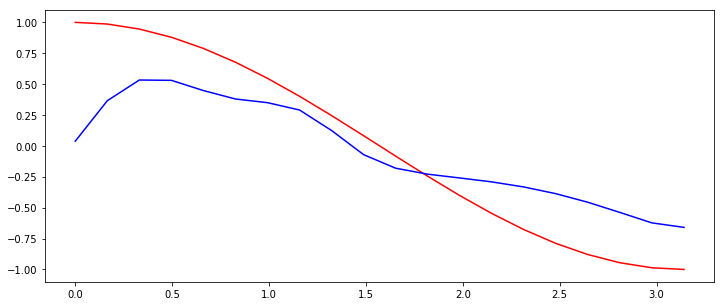

c [[[-0.46135825]
  [-0.086154  ]
  [ 0.32341892]
  [ 0.73969686]
  [ 1.1069539 ]
  [ 1.368976  ]
  [ 1.52009   ]
  [ 1.5926949 ]
  [ 1.6234149 ]
  [ 1.6377465 ]
  [ 1.6501416 ]
  [ 1.6680284 ]
  [ 1.6950307 ]
  [ 1.7327397 ]
  [ 1.7814386 ]
  [ 1.8402922 ]
  [ 1.9074309 ]
  [ 1.9801738 ]
  [ 2.0553045 ]
  [ 2.1291273 ]]]
epoch:1  | loss:2.112300395965576  


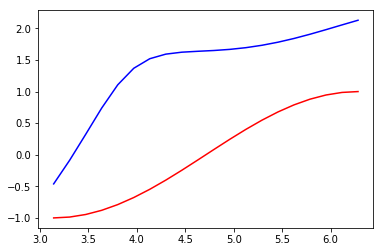

c [[[ 1.9271529 ]
  [ 1.9603958 ]
  [ 2.016918  ]
  [ 2.0629833 ]
  [ 2.0800617 ]
  [ 2.0137768 ]
  [ 1.8039651 ]
  [ 1.4830096 ]
  [ 1.153474  ]
  [ 0.86388725]
  [ 0.49415642]
  [-0.03390615]
  [-0.42215577]
  [-0.58583254]
  [-0.66837335]
  [-0.7336942 ]
  [-0.7997379 ]
  [-0.86762565]
  [-0.9269232 ]
  [-0.9503785 ]]]
epoch:2  | loss:0.6197080612182617  


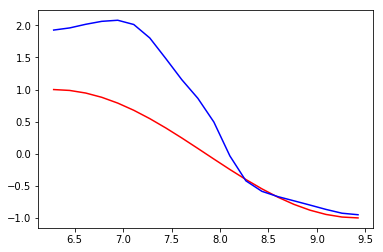

c [[[-0.848582  ]
  [-0.6460742 ]
  [-0.42106244]
  [-0.15607348]
  [ 0.16252723]
  [ 0.48657456]
  [ 0.7551992 ]
  [ 0.9426527 ]
  [ 1.0600364 ]
  [ 1.1318521 ]
  [ 1.1796384 ]
  [ 1.2180151 ]
  [ 1.2559519 ]
  [ 1.2986497 ]
  [ 1.3488238 ]
  [ 1.4073619 ]
  [ 1.4735465 ]
  [ 1.5449835 ]
  [ 1.6174232 ]
  [ 1.684803  ]]]
epoch:3  | loss:0.7868083715438843  


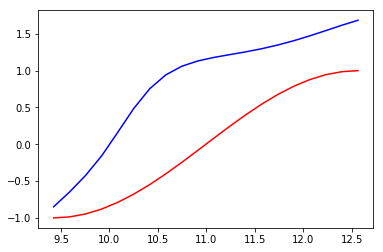

c [[[ 1.4705896 ]
  [ 1.4773197 ]
  [ 1.4870243 ]
  [ 1.4389117 ]
  [ 1.2530687 ]
  [ 0.9082965 ]
  [ 0.5771398 ]
  [ 0.36688286]
  [ 0.08743423]
  [-0.32896337]
  [-0.6185762 ]
  [-0.7264253 ]
  [-0.76786333]
  [-0.79503286]
  [-0.8235387 ]
  [-0.85976654]
  [-0.90814126]
  [-0.97182876]
  [-1.0503953 ]
  [-1.135061  ]]]
epoch:4  | loss:0.11489395052194595  


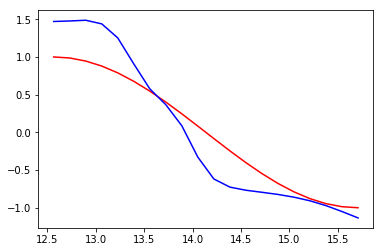

c [[[-1.1348479 ]
  [-1.1908724 ]
  [-1.2184094 ]
  [-1.152508  ]
  [-0.99393237]
  [-0.7946483 ]
  [-0.5300962 ]
  [-0.23667791]
  [ 0.03406945]
  [ 0.25144777]
  [ 0.4124879 ]
  [ 0.5304432 ]
  [ 0.62102294]
  [ 0.6962589 ]
  [ 0.7638557 ]
  [ 0.82790613]
  [ 0.88925767]
  [ 0.9452652 ]
  [ 0.98939776]
  [ 1.011601  ]]]
epoch:5  | loss:0.037574704736471176  


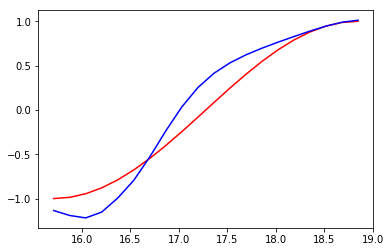

c [[[ 0.7738677 ]
  [ 0.6865965 ]
  [ 0.5843291 ]
  [ 0.41513893]
  [ 0.20842221]
  [ 0.0998657 ]
  [ 0.09330794]
  [ 0.01159263]
  [-0.2669772 ]
  [-0.5454922 ]
  [-0.66382915]
  [-0.7027788 ]
  [-0.72208315]
  [-0.7394972 ]
  [-0.76041603]
  [-0.78767926]
  [-0.82439446]
  [-0.87478685]
  [-0.94380426]
  [-1.0345118 ]]]
epoch:6  | loss:0.1438833475112915  


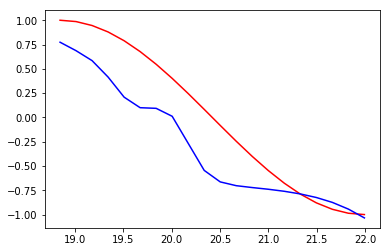

c [[[-0.99931395]
  [-1.0881988 ]
  [-1.1891004 ]
  [-1.2764577 ]
  [-1.3107389 ]
  [-1.2551749 ]
  [-1.1811876 ]
  [-1.0541857 ]
  [-0.85648847]
  [-0.6407009 ]
  [-0.44181013]
  [-0.27498987]
  [-0.1420056 ]
  [-0.03686062]
  [ 0.04834089]
  [ 0.11982593]
  [ 0.18097037]
  [ 0.23212358]
  [ 0.27097526]
  [ 0.29376468]]]
epoch:7  | loss:0.3189844489097595  


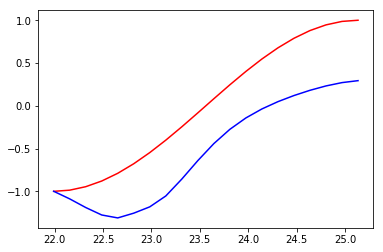

c [[[ 0.1529308 ]
  [ 0.13330671]
  [ 0.11855745]
  [ 0.05875587]
  [-0.01084375]
  [ 0.01808158]
  [ 0.12382749]
  [ 0.12280729]
  [-0.08785376]
  [-0.32676643]
  [-0.43520817]
  [-0.47189584]
  [-0.49219757]
  [-0.5130558 ]
  [-0.53910744]
  [-0.57189566]
  [-0.6129205 ]
  [-0.66510105]
  [-0.7333448 ]
  [-0.823441  ]]]
epoch:8  | loss:0.24547255039215088  


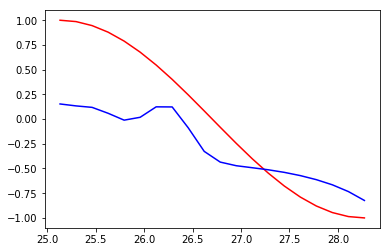

c [[[-0.793898  ]
  [-0.8955096 ]
  [-1.0144454 ]
  [-1.1218302 ]
  [-1.1844221 ]
  [-1.1977383 ]
  [-1.2049757 ]
  [-1.1515378 ]
  [-0.99508   ]
  [-0.79553944]
  [-0.60064554]
  [-0.43219957]
  [-0.29543975]
  [-0.18646511]
  [-0.09806904]
  [-0.02383748]
  [ 0.04023466]
  [ 0.09534201]
  [ 0.14002171]
  [ 0.1710313 ]]]
epoch:9  | loss:0.4324963092803955  


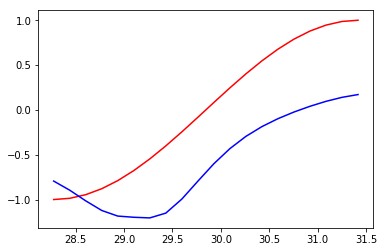

c [[[ 0.08844817]
  [ 0.0926936 ]
  [ 0.09567532]
  [ 0.05064946]
  [-0.00404623]
  [ 0.05065653]
  [ 0.20914832]
  [ 0.3042836 ]
  [ 0.20261726]
  [-0.0105322 ]
  [-0.15367645]
  [-0.20878124]
  [-0.23509932]
  [-0.2605086 ]
  [-0.29352656]
  [-0.33630824]
  [-0.38975486]
  [-0.4558346 ]
  [-0.53845227]
  [-0.6422787 ]]]
epoch:10  | loss:0.2736095190048218  


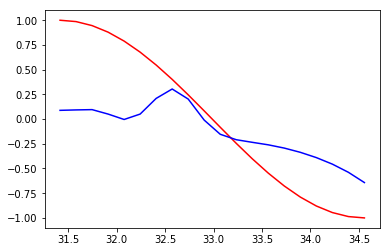

c [[[-0.6691159 ]
  [-0.7780411 ]
  [-0.8963946 ]
  [-0.9981533 ]
  [-1.0672367 ]
  [-1.1211594 ]
  [-1.1433079 ]
  [-1.0489304 ]
  [-0.8562063 ]
  [-0.6381742 ]
  [-0.43811336]
  [-0.27376017]
  [-0.14502886]
  [-0.04380086]
  [ 0.03888777]
  [ 0.10974017]
  [ 0.17248777]
  [ 0.22765937]
  [ 0.27241305]
  [ 0.30113462]]]
epoch:11  | loss:0.29857373237609863  


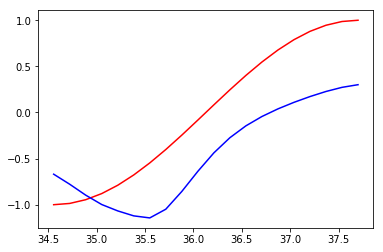

c [[[ 0.24013844]
  [ 0.24055222]
  [ 0.23377213]
  [ 0.17180929]
  [ 0.07896137]
  [ 0.08718783]
  [ 0.23623255]
  [ 0.38152143]
  [ 0.3632237 ]
  [ 0.17618367]
  [-0.02124071]
  [-0.12815689]
  [-0.18052098]
  [-0.21849492]
  [-0.25803292]
  [-0.3046393 ]
  [-0.36106998]
  [-0.43052804]
  [-0.51729745]
  [-0.6243836 ]]]
epoch:12  | loss:0.22968849539756775  


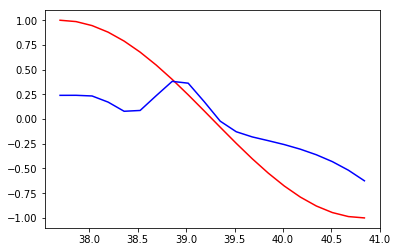

c [[[-0.6833174 ]
  [-0.7843513 ]
  [-0.8817301 ]
  [-0.9534715 ]
  [-1.0175724 ]
  [-1.0587361 ]
  [-0.9873653 ]
  [-0.78986686]
  [-0.5463357 ]
  [-0.31777304]
  [-0.13383257]
  [ 0.00431967]
  [ 0.10835326]
  [ 0.1909815 ]
  [ 0.26180738]
  [ 0.32706147]
  [ 0.38996363]
  [ 0.45054328]
  [ 0.50486016]
  [ 0.54435134]]]
epoch:13  | loss:0.12335537374019623  


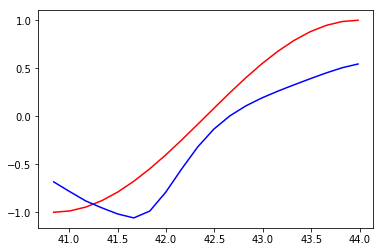

c [[[ 0.504446  ]
  [ 0.5057106 ]
  [ 0.48979333]
  [ 0.4031898 ]
  [ 0.24518713]
  [ 0.15071622]
  [ 0.23212138]
  [ 0.37244835]
  [ 0.3959913 ]
  [ 0.23770496]
  [ 0.00700504]
  [-0.15338607]
  [-0.24071285]
  [-0.29720205]
  [-0.34517002]
  [-0.39449102]
  [-0.45098028]
  [-0.5196471 ]
  [-0.60445774]
  [-0.7045021 ]]]
epoch:14  | loss:0.13002431392669678  


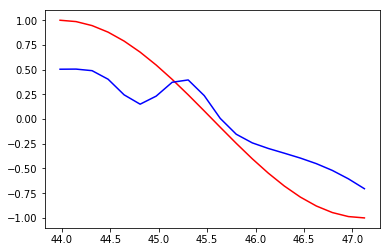

c [[[-0.7575675 ]
  [-0.8257006 ]
  [-0.87579805]
  [-0.9265878 ]
  [-0.9684094 ]
  [-0.90794426]
  [-0.7058051 ]
  [-0.43925995]
  [-0.18550378]
  [ 0.01163572]
  [ 0.14996451]
  [ 0.24648535]
  [ 0.3187005 ]
  [ 0.37925422]
  [ 0.43632525]
  [ 0.49491066]
  [ 0.55759597]
  [ 0.62454003]
  [ 0.6926508 ]
  [ 0.75428724]]]
epoch:15  | loss:0.037690937519073486  


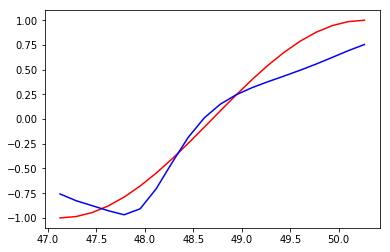

c [[[ 0.7439633 ]
  [ 0.7700613 ]
  [ 0.7789752 ]
  [ 0.70995706]
  [ 0.5204022 ]
  [ 0.3002699 ]
  [ 0.25366223]
  [ 0.34247124]
  [ 0.3662241 ]
  [ 0.21761948]
  [-0.03123382]
  [-0.22799745]
  [-0.34327328]
  [-0.4160782 ]
  [-0.4719377 ]
  [-0.52397364]
  [-0.5803149 ]
  [-0.64659035]
  [-0.72450745]
  [-0.8066219 ]]]
epoch:16  | loss:0.046328239142894745  


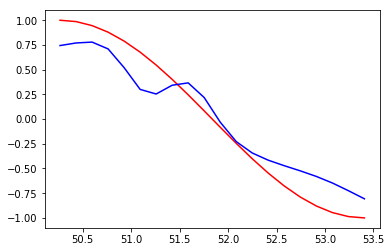

c [[[-0.82341325]
  [-0.84237266]
  [-0.86309683]
  [-0.8928329 ]
  [-0.8538662 ]
  [-0.6702751 ]
  [-0.3942906 ]
  [-0.11520353]
  [ 0.10133818]
  [ 0.24424592]
  [ 0.3345891 ]
  [ 0.3955538 ]
  [ 0.4434326 ]
  [ 0.48827502]
  [ 0.53603315]
  [ 0.59009147]
  [ 0.6520269 ]
  [ 0.7217109 ]
  [ 0.79677856]
  [ 0.87161493]]]
epoch:17  | loss:0.035041265189647675  


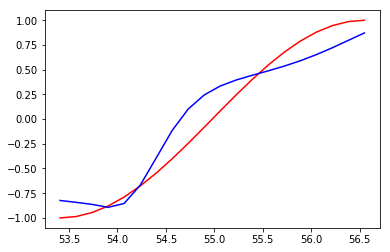

c [[[ 0.87699556]
  [ 0.92582655]
  [ 0.9679456 ]
  [ 0.94956934]
  [ 0.8068949 ]
  [ 0.5397723 ]
  [ 0.34246236]
  [ 0.33456105]
  [ 0.32547563]
  [ 0.16140121]
  [-0.10961257]
  [-0.33211857]
  [-0.46561605]
  [-0.54829514]
  [-0.60803705]
  [-0.66026664]
  [-0.714394  ]
  [-0.7754977 ]
  [-0.84193695]
  [-0.8994131 ]]]
epoch:18  | loss:0.011165852658450603  


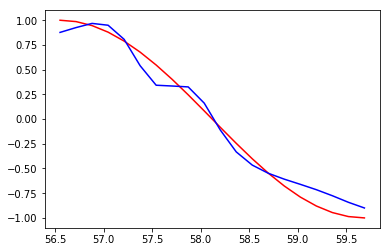

c [[[-0.87277985]
  [-0.85671806]
  [-0.8518921 ]
  [-0.833864  ]
  [-0.7051039 ]
  [-0.44857943]
  [-0.14820382]
  [ 0.10638848]
  [ 0.27506247]
  [ 0.37391487]
  [ 0.43240914]
  [ 0.47250238]
  [ 0.50744104]
  [ 0.5447773 ]
  [ 0.5887563 ]
  [ 0.64159524]
  [ 0.7040322 ]
  [ 0.7754234 ]
  [ 0.8534676 ]
  [ 0.9335847 ]]]
epoch:19  | loss:0.06481802463531494  


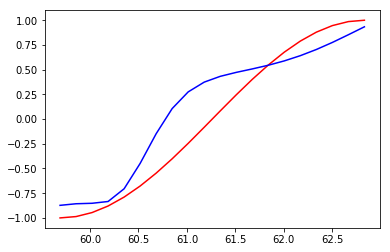

c [[[ 0.93975675]
  [ 0.99957013]
  [ 1.0604813 ]
  [ 1.0778366 ]
  [ 0.9932567 ]
  [ 0.7576096 ]
  [ 0.47669643]
  [ 0.3590358 ]
  [ 0.29836756]
  [ 0.10406563]
  [-0.1937682 ]
  [-0.43669355]
  [-0.58178973]
  [-0.6692728 ]
  [-0.7295425 ]
  [-0.7798693 ]
  [-0.8304211 ]
  [-0.88554966]
  [-0.941136  ]
  [-0.9792762 ]]]
epoch:20  | loss:0.011103959754109383  


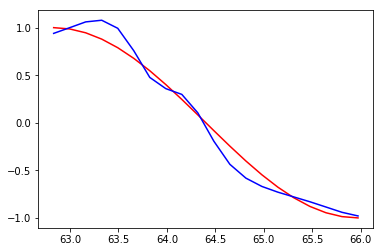

c [[[-0.92198807]
  [-0.88190776]
  [-0.84566903]
  [-0.78091335]
  [-0.5956671 ]
  [-0.30656576]
  [-0.00604945]
  [ 0.22115254]
  [ 0.35699087]
  [ 0.43054694]
  [ 0.47251648]
  [ 0.5025941 ]
  [ 0.53182673]
  [ 0.566312  ]
  [ 0.6094557 ]
  [ 0.6629363 ]
  [ 0.7269924 ]
  [ 0.80047446]
  [ 0.8807917 ]
  [ 0.9637074 ]]]
epoch:21  | loss:0.09156104922294617  


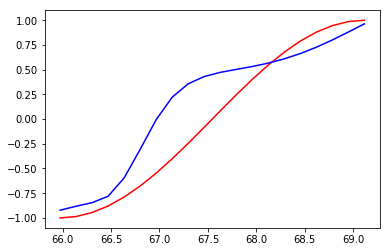

c [[[ 0.9641154 ]
  [ 1.0291389 ]
  [ 1.1002808 ]
  [ 1.1376504 ]
  [ 1.0908498 ]
  [ 0.8922894 ]
  [ 0.59289455]
  [ 0.39808974]
  [ 0.29135182]
  [ 0.0711377 ]
  [-0.24732114]
  [-0.5056296 ]
  [-0.6607138 ]
  [-0.75304234]
  [-0.8146256 ]
  [-0.86409473]
  [-0.91237485]
  [-0.96375227]
  [-1.0134462 ]
  [-1.0428331 ]]]
epoch:22  | loss:0.023404020816087723  


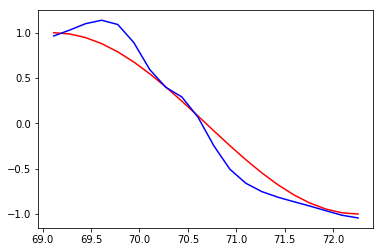

c [[[-0.96807814]
  [-0.9174521 ]
  [-0.8579984 ]
  [-0.7688224 ]
  [-0.5624403 ]
  [-0.2620075 ]
  [ 0.03676203]
  [ 0.25172922]
  [ 0.37383792]
  [ 0.43702176]
  [ 0.47229573]
  [ 0.49839267]
  [ 0.5254854 ]
  [ 0.5591732 ]
  [ 0.6026708 ]
  [ 0.65759695]
  [ 0.7239859 ]
  [ 0.80022526]
  [ 0.8832309 ]
  [ 0.9686711 ]]]
epoch:23  | loss:0.09909868985414505  


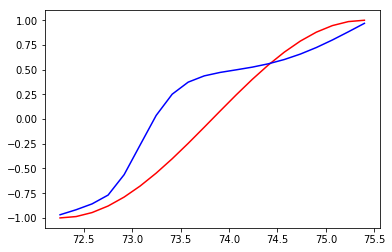

c [[[ 0.96228075]
  [ 1.0302507 ]
  [ 1.1075754 ]
  [ 1.1561404 ]
  [ 1.1303853 ]
  [ 0.955786  ]
  [ 0.66172135]
  [ 0.4316958 ]
  [ 0.30262157]
  [ 0.07560056]
  [-0.2496365 ]
  [-0.5168282 ]
  [-0.6830585 ]
  [-0.7843933 ]
  [-0.851658  ]
  [-0.9038298 ]
  [-0.9528552 ]
  [-1.004004  ]
  [-1.0536202 ]
  [-1.0844549 ]]]
epoch:24  | loss:0.03092622198164463  


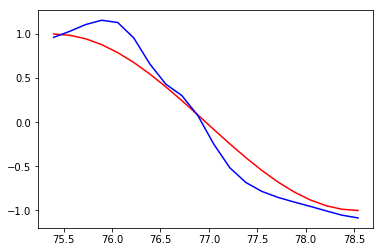

c [[[-1.0032285 ]
  [-0.9568106 ]
  [-0.890779  ]
  [-0.801355  ]
  [-0.6035788 ]
  [-0.30460748]
  [-0.00161728]
  [ 0.21887413]
  [ 0.34360763]
  [ 0.40725157]
  [ 0.4421995 ]
  [ 0.46787038]
  [ 0.4947249 ]
  [ 0.5285585 ]
  [ 0.572845  ]
  [ 0.62948287]
  [ 0.69861746]
  [ 0.7782905 ]
  [ 0.86472297]
  [ 0.95310295]]]
epoch:25  | loss:0.08773670345544815  


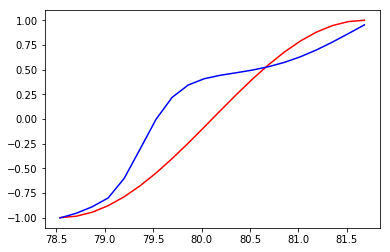

c [[[ 0.941955  ]
  [ 1.0118712 ]
  [ 1.092794  ]
  [ 1.1470406 ]
  [ 1.1311415 ]
  [ 0.96913517]
  [ 0.68532145]
  [ 0.45047465]
  [ 0.3248004 ]
  [ 0.11209437]
  [-0.20560828]
  [-0.47326654]
  [-0.64737797]
  [-0.7607337 ]
  [-0.83886814]
  [-0.89849186]
  [-0.95194983]
  [-1.0062404 ]
  [-1.0601952 ]
  [-1.0998622 ]]]
epoch:26  | loss:0.028176244348287582  


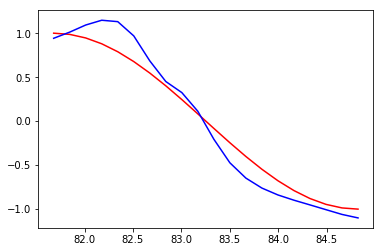

c [[[-1.0224185 ]
  [-0.99035764]
  [-0.93268937]
  [-0.8585648 ]
  [-0.69565827]
  [-0.41211435]
  [-0.10289139]
  [ 0.13713658]
  [ 0.27834707]
  [ 0.35151744]
  [ 0.3913319 ]
  [ 0.41939157]
  [ 0.4474637 ]
  [ 0.48210758]
  [ 0.5273677 ]
  [ 0.5856885 ]
  [ 0.65763134]
  [ 0.74116683]
  [ 0.83174944]
  [ 0.92364633]]]
epoch:27  | loss:0.06735585629940033  


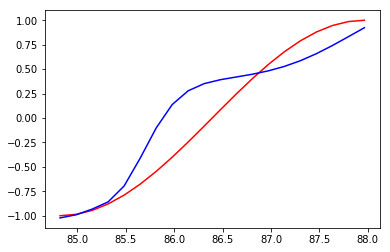

c [[[ 0.9114676 ]
  [ 0.982838  ]
  [ 1.0654209 ]
  [ 1.1212156 ]
  [ 1.1059291 ]
  [ 0.94583875]
  [ 0.6709956 ]
  [ 0.45152915]
  [ 0.34752107]
  [ 0.161592  ]
  [-0.13732219]
  [-0.39878112]
  [-0.5712656 ]
  [-0.6920246 ]
  [-0.78268886]
  [-0.8539469 ]
  [-0.915778  ]
  [-0.9761847 ]
  [-1.0369451 ]
  [-1.0885391 ]]]
epoch:28  | loss:0.019592169672250748  


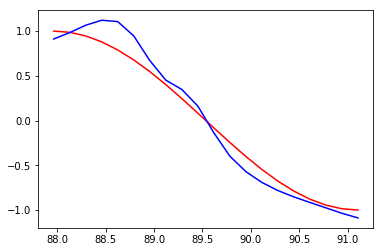

c [[[-1.0232881 ]
  [-1.0112134 ]
  [-0.9700022 ]
  [-0.9154222 ]
  [-0.8043728 ]
  [-0.5570064 ]
  [-0.24817863]
  [ 0.01807931]
  [ 0.18747666]
  [ 0.27896562]
  [ 0.32896188]
  [ 0.36242035]
  [ 0.39336905]
  [ 0.42968777]
  [ 0.47625384]
  [ 0.53621423]
  [ 0.61075664]
  [ 0.69809437]
  [ 0.7930964 ]
  [ 0.8888351 ]]]
epoch:29  | loss:0.04886237531900406  


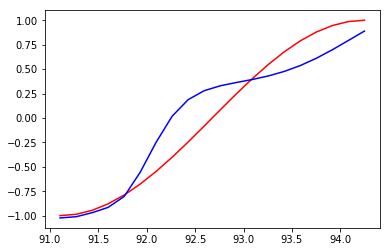

c [[[ 0.8799137 ]
  [ 0.9523046 ]
  [ 1.0346923 ]
  [ 1.0878602 ]
  [ 1.0629743 ]
  [ 0.8933482 ]
  [ 0.6246755 ]
  [ 0.43612352]
  [ 0.3615404 ]
  [ 0.20046404]
  [-0.07512683]
  [-0.3249919 ]
  [-0.48902178]
  [-0.6057695 ]
  [-0.70218897]
  [-0.78428805]
  [-0.85654557]
  [-0.9252076 ]
  [-0.9938024 ]
  [-1.0570333 ]]]
epoch:30  | loss:0.01227654330432415  


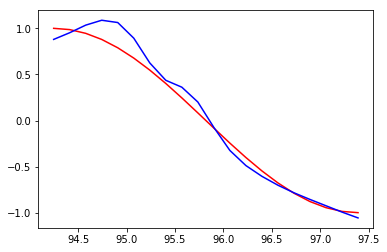

c [[[-1.0088313 ]
  [-1.0189067 ]
  [-0.99649215]
  [-0.95829177]
  [-0.8958405 ]
  [-0.70880425]
  [-0.4141852 ]
  [-0.12521788]
  [ 0.08005384]
  [ 0.19826314]
  [ 0.26414427]
  [ 0.306493  ]
  [ 0.34243122]
  [ 0.38172194]
  [ 0.4303632 ]
  [ 0.49226204]
  [ 0.56925845]
  [ 0.6599417 ]
  [ 0.758834  ]
  [ 0.85790646]]]
epoch:31  | loss:0.03838667273521423  


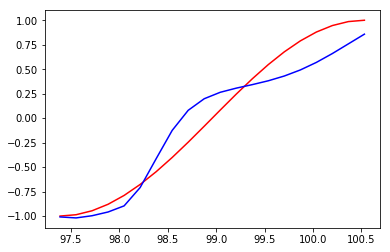

c [[[ 0.85571223]
  [ 0.92826825]
  [ 1.0081375 ]
  [ 1.0531702 ]
  [ 1.0061686 ]
  [ 0.8162314 ]
  [ 0.5539082 ]
  [ 0.40953237]
  [ 0.35992575]
  [ 0.20852524]
  [-0.04834658]
  [-0.2805627 ]
  [-0.43292022]
  [-0.5392065 ]
  [-0.6312666 ]
  [-0.7166704 ]
  [-0.79588103]
  [-0.8715939 ]
  [-0.9469462 ]
  [-1.019382  ]]]
epoch:32  | loss:0.008947889320552349  


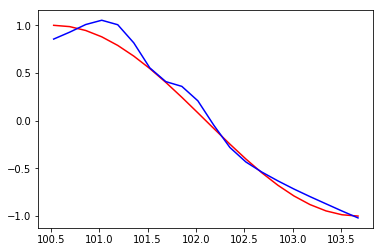

c [[[-0.9892967 ]
  [-1.0195893 ]
  [-1.0159707 ]
  [-0.98818064]
  [-0.95414066]
  [-0.83543897]
  [-0.5742705 ]
  [-0.27490547]
  [-0.03333911]
  [ 0.11793229]
  [ 0.20505711]
  [ 0.25991163]
  [ 0.30321476]
  [ 0.34710285]
  [ 0.39896706]
  [ 0.46353886]
  [ 0.5431485 ]
  [ 0.63660324]
  [ 0.73813784]
  [ 0.8389298 ]]]
epoch:33  | loss:0.03584181144833565  


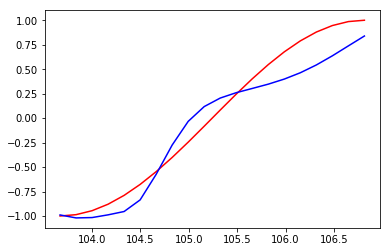

c [[[ 0.8448442 ]
  [ 0.9159318 ]
  [ 0.9901711 ]
  [ 1.0193379 ]
  [ 0.9372413 ]
  [ 0.7207972 ]
  [ 0.4728013 ]
  [ 0.37912622]
  [ 0.33831587]
  [ 0.17763591]
  [-0.06772763]
  [-0.27791712]
  [-0.4148662 ]
  [-0.5106497 ]
  [-0.5954838 ]
  [-0.678138  ]
  [-0.7580441 ]
  [-0.83581114]
  [-0.91379595]
  [-0.9909127 ]]]
epoch:34  | loss:0.007601094897836447  


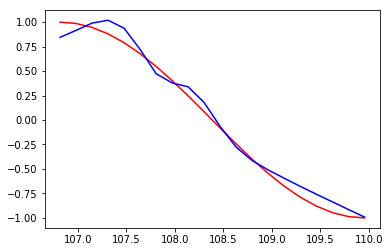

c [[[-0.9754409 ]
  [-1.020309  ]
  [-1.0332942 ]
  [-1.0113003 ]
  [-0.98482335]
  [-0.91577184]
  [-0.7051279 ]
  [-0.4097361 ]
  [-0.1397304 ]
  [ 0.04662275]
  [ 0.15867615]
  [ 0.22892034]
  [ 0.2816466 ]
  [ 0.3316458 ]
  [ 0.38788712]
  [ 0.45592856]
  [ 0.5383831 ]
  [ 0.63391453]
  [ 0.73638713]
  [ 0.83658946]]]
epoch:35  | loss:0.03696736693382263  


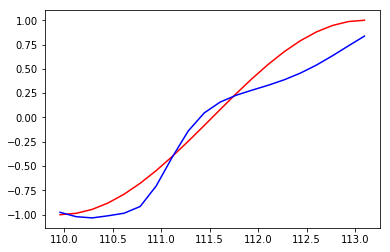

c [[[ 0.849669  ]
  [ 0.9171071 ]
  [ 0.9819666 ]
  [ 0.98621476]
  [ 0.86160004]
  [ 0.6204405 ]
  [ 0.40128902]
  [ 0.35109386]
  [ 0.30034956]
  [ 0.12180746]
  [-0.11299241]
  [-0.30029458]
  [-0.4219219 ]
  [-0.5101447 ]
  [-0.5906086 ]
  [-0.67007345]
  [-0.7473584 ]
  [-0.82278264]
  [-0.8988677 ]
  [-0.9756583 ]]]
epoch:36  | loss:0.007256230805069208  


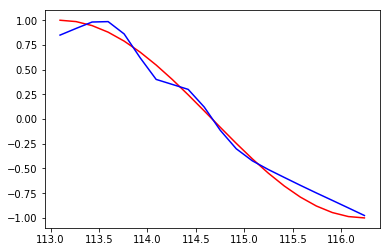

c [[[-0.96758235]
  [-1.0192877 ]
  [-1.042849  ]
  [-1.0246668 ]
  [-0.994905  ]
  [-0.9485643 ]
  [-0.78578895]
  [-0.5053301 ]
  [-0.22063497]
  [-0.0044224 ]
  [ 0.13211414]
  [ 0.2182757 ]
  [ 0.28109375]
  [ 0.33784315]
  [ 0.3990067 ]
  [ 0.47081658]
  [ 0.5558969 ]
  [ 0.65245783]
  [ 0.75398636]
  [ 0.85138035]]]
epoch:37  | loss:0.0365077406167984  


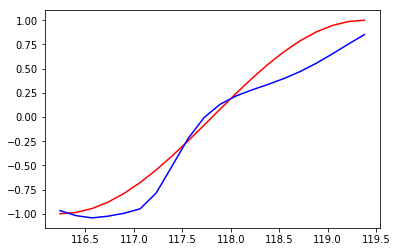

c [[[ 0.8692093 ]
  [ 0.9310814 ]
  [ 0.9831253 ]
  [ 0.9561914 ]
  [ 0.7919164 ]
  [ 0.5354072 ]
  [ 0.35495988]
  [ 0.33124074]
  [ 0.263164  ]
  [ 0.07343405]
  [-0.14798614]
  [-0.3173616 ]
  [-0.42994496]
  [-0.5161387 ]
  [-0.59636015]
  [-0.67441154]
  [-0.74872214]
  [-0.8202565 ]
  [-0.89224887]
  [-0.9655632 ]]]
epoch:38  | loss:0.008180118165910244  


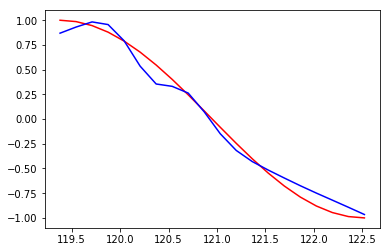

c [[[-0.95806426]
  [-1.0094237 ]
  [-1.034809  ]
  [-1.0166078 ]
  [-0.98203117]
  [-0.94197303]
  [-0.806802  ]
  [-0.5439315 ]
  [-0.25816935]
  [-0.02371836]
  [ 0.13152027]
  [ 0.23074126]
  [ 0.30219245]
  [ 0.3649277 ]
  [ 0.43052083]
  [ 0.5055525 ]
  [ 0.59234065]
  [ 0.6885498 ]
  [ 0.78754205]
  [ 0.88073593]]]
epoch:39  | loss:0.030850376933813095  


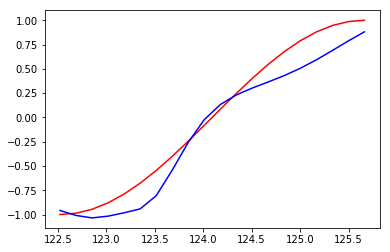

c [[[ 0.90046394]
  [ 0.95584095]
  [ 0.99354005]
  [ 0.9361006 ]
  [ 0.74235547]
  [ 0.48169553]
  [ 0.33718574]
  [ 0.32604438]
  [ 0.24706906]
  [ 0.05852586]
  [-0.14965034]
  [-0.3102575 ]
  [-0.42277658]
  [-0.5132792 ]
  [-0.59728   ]
  [-0.67623115]
  [-0.74874884]
  [-0.81681633]
  [-0.8844385 ]
  [-0.9528644 ]]]
epoch:40  | loss:0.009141610935330391  


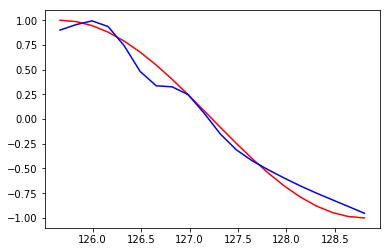

c [[[-0.94252926]
  [-0.98792934]
  [-1.0066333 ]
  [-0.98230207]
  [-0.94412005]
  [-0.90391904]
  [-0.7766238 ]
  [-0.5271324 ]
  [-0.25024194]
  [-0.00981778]
  [ 0.15607321]
  [ 0.26373595]
  [ 0.34112763]
  [ 0.40817255]
  [ 0.47697455]
  [ 0.554065  ]
  [ 0.64129615]
  [ 0.73590803]
  [ 0.8315053 ]
  [ 0.92020965]]]
epoch:41  | loss:0.021097224205732346  


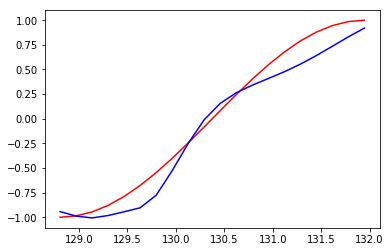

c [[[ 0.93908125]
  [ 0.98817354]
  [ 1.0125632 ]
  [ 0.9308445 ]
  [ 0.7184803 ]
  [ 0.46033353]
  [ 0.3413127 ]
  [ 0.33609504]
  [ 0.25544482]
  [ 0.07563633]
  [-0.1222706 ]
  [-0.28215376]
  [-0.40235984]
  [-0.50305736]
  [-0.59458935]
  [-0.6764767 ]
  [-0.7481494 ]
  [-0.8130548 ]
  [-0.87601167]
  [-0.9382835 ]]]
epoch:42  | loss:0.009242022410035133  


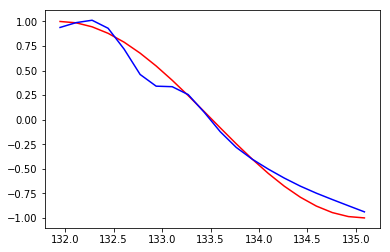

c [[[-0.92446977]
  [-0.95945466]
  [-0.9650638 ]
  [-0.9297478 ]
  [-0.88751626]
  [-0.84241873]
  [-0.7113484 ]
  [-0.47320014]
  [-0.21320814]
  [ 0.02420545]
  [ 0.19495457]
  [ 0.307777  ]
  [ 0.38911855]
  [ 0.4590968 ]
  [ 0.5299604 ]
  [ 0.6080321 ]
  [ 0.69472647]
  [ 0.78713703]
  [ 0.87931466]
  [ 0.9639977 ]]]
epoch:43  | loss:0.012090640142560005  


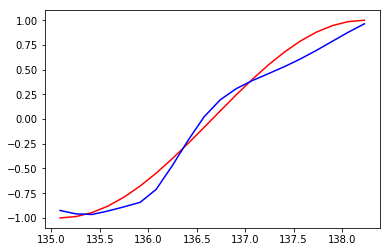

c [[[ 0.97951174]
  [ 1.0231456 ]
  [ 1.0365433 ]
  [ 0.93733454]
  [ 0.71382964]
  [ 0.4597924 ]
  [ 0.3560557 ]
  [ 0.35229954]
  [ 0.2714902 ]
  [ 0.09830853]
  [-0.09475829]
  [-0.25917208]
  [-0.3920908 ]
  [-0.50681645]
  [-0.60703063]
  [-0.69084585]
  [-0.75986934]
  [-0.8198675 ]
  [-0.87661815]
  [-0.93101335]]]
epoch:44  | loss:0.008486928418278694  


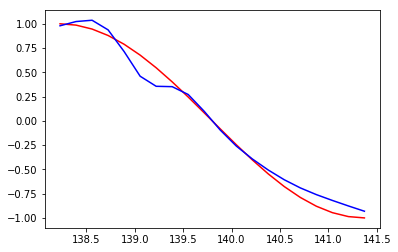

c [[[-0.91358364]
  [-0.93607366]
  [-0.9259771 ]
  [-0.875924  ]
  [-0.82347274]
  [-0.76676154]
  [-0.6288834 ]
  [-0.4053194 ]
  [-0.1709657 ]
  [ 0.05686858]
  [ 0.23102453]
  [ 0.34920958]
  [ 0.43472221]
  [ 0.50757456]
  [ 0.5802008 ]
  [ 0.65883565]
  [ 0.7447331 ]
  [ 0.8350667 ]
  [ 0.9243628 ]
  [ 1.0057801 ]]]
epoch:45  | loss:0.007372514810413122  


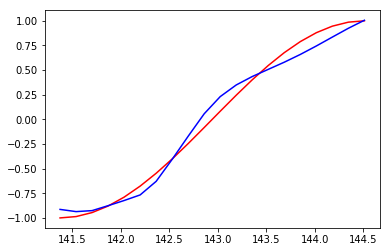

c [[[ 1.0159621 ]
  [ 1.054955  ]
  [ 1.0593967 ]
  [ 0.94740826]
  [ 0.7168774 ]
  [ 0.4667917 ]
  [ 0.37189835]
  [ 0.3645532 ]
  [ 0.2769943 ]
  [ 0.09988025]
  [-0.09801602]
  [-0.27311346]
  [-0.42215985]
  [-0.5496167 ]
  [-0.6530473 ]
  [-0.73245835]
  [-0.79393345]
  [-0.84602934]
  [-0.8950022 ]
  [-0.9408967 ]]]
epoch:46  | loss:0.006983120925724506  


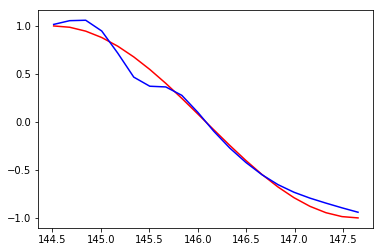

c [[[-0.91935015]
  [-0.93155456]
  [-0.9070662 ]
  [-0.8373803 ]
  [-0.762321  ]
  [-0.6870396 ]
  [-0.54492366]
  [-0.33926103]
  [-0.1396257 ]
  [ 0.06950948]
  [ 0.24769816]
  [ 0.37477782]
  [ 0.4672294 ]
  [ 0.544562  ]
  [ 0.61977243]
  [ 0.69944143]
  [ 0.7849963 ]
  [ 0.87392545]
  [ 0.96117175]
  [ 1.04017   ]]]
epoch:47  | loss:0.006390585098415613  


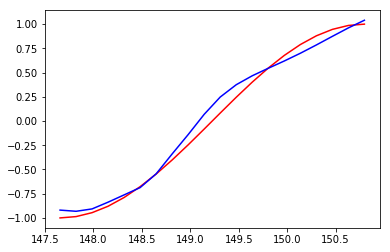

c [[[ 1.0440207 ]
  [ 1.0791512 ]
  [ 1.076689  ]
  [ 0.9559701 ]
  [ 0.7217695 ]
  [ 0.47624177]
  [ 0.38743734]
  [ 0.37461704]
  [ 0.27602977]
  [ 0.08668631]
  [-0.1251953 ]
  [-0.31804138]
  [-0.48371673]
  [-0.61715585]
  [-0.71591735]
  [-0.78594553]
  [-0.83807355]
  [-0.88241607]
  [-0.92476636]
  [-0.96409804]]]
epoch:48  | loss:0.006833308842033148  


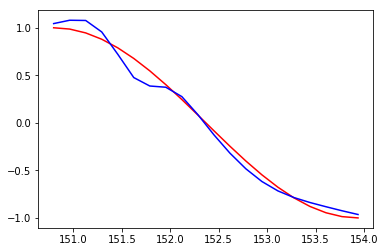

c [[[-0.9383068 ]
  [-0.9459466 ]
  [-0.91288245]
  [-0.8243063 ]
  [-0.7193321 ]
  [-0.62317055]
  [-0.4809034 ]
  [-0.29085702]
  [-0.12363583]
  [ 0.05769718]
  [ 0.23827624]
  [ 0.37783873]
  [ 0.4807446 ]
  [ 0.5648751 ]
  [ 0.64408237]
  [ 0.72575295]
  [ 0.81184363]
  [ 0.90029144]
  [ 0.98648405]
  [ 1.064068  ]]]
epoch:49  | loss:0.006637058220803738  


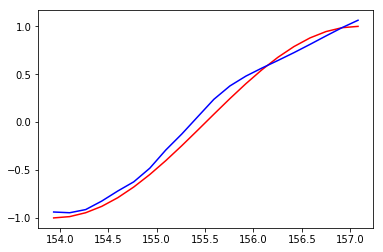

c [[[ 1.0619047 ]
  [ 1.0944878 ]
  [ 1.0883894 ]
  [ 0.9643246 ]
  [ 0.73089147]
  [ 0.49124384]
  [ 0.4079101 ]
  [ 0.39505613]
  [ 0.2933253 ]
  [ 0.09629455]
  [-0.13029554]
  [-0.3428783 ]
  [-0.5237383 ]
  [-0.6619024 ]
  [-0.75807863]
  [-0.82313246]
  [-0.8706913 ]
  [-0.9114604 ]
  [-0.9508711 ]
  [-0.98745984]]]
epoch:50  | loss:0.007656533271074295  


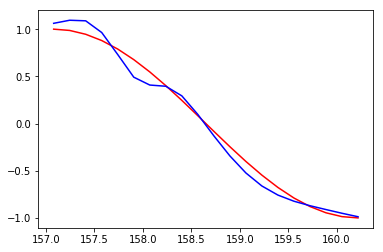

c [[[-0.95984805]
  [-0.97017473]
  [-0.9392638 ]
  [-0.845516  ]
  [-0.7221775 ]
  [-0.6146755 ]
  [-0.47878543]
  [-0.29876673]
  [-0.14150476]
  [ 0.02799845]
  [ 0.21517846]
  [ 0.36768144]
  [ 0.48086804]
  [ 0.5716742 ]
  [ 0.65490407]
  [ 0.7387946 ]
  [ 0.8258721 ]
  [ 0.9145213 ]
  [ 1.0004976 ]
  [ 1.0776997 ]]]
epoch:51  | loss:0.005113733466714621  


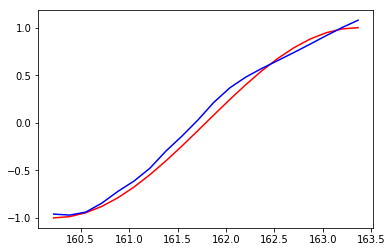

c [[[ 1.071188  ]
  [ 1.1030695 ]
  [ 1.0971797 ]
  [ 0.97535354]
  [ 0.7470817 ]
  [ 0.5141147 ]
  [ 0.4356143 ]
  [ 0.43103355]
  [ 0.34115285]
  [ 0.15161645]
  [-0.07948597]
  [-0.307115  ]
  [-0.5054947 ]
  [-0.6574224 ]
  [-0.76224434]
  [-0.83201665]
  [-0.88197136]
  [-0.92397016]
  [-0.9641504 ]
  [-1.0015949 ]]]
epoch:52  | loss:0.007158900611102581  


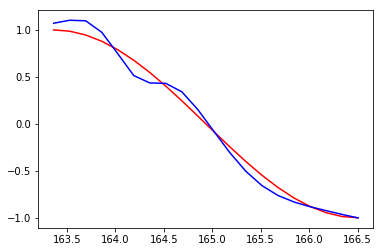

c [[[-0.974862  ]
  [-0.9905122 ]
  [-0.9675775 ]
  [-0.8802407 ]
  [-0.75293374]
  [-0.6433245 ]
  [-0.51881945]
  [-0.3484801 ]
  [-0.1887936 ]
  [-0.01709723]
  [ 0.1823833 ]
  [ 0.34838575]
  [ 0.47125548]
  [ 0.5682437 ]
  [ 0.65528554]
  [ 0.74142534]
  [ 0.8297245 ]
  [ 0.91897005]
  [ 1.0052407 ]
  [ 1.0826483 ]]]
epoch:53  | loss:0.0026849175337702036  


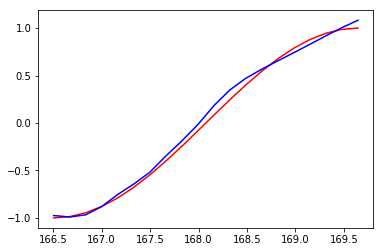

c [[[ 1.0733724 ]
  [ 1.1054893 ]
  [ 1.1009984 ]
  [ 0.9828654 ]
  [ 0.76090366]
  [ 0.53515047]
  [ 0.46137077]
  [ 0.4662866 ]
  [ 0.39216053]
  [ 0.21858817]
  [-0.00501963]
  [-0.23694198]
  [-0.44948727]
  [-0.61956996]
  [-0.7402985 ]
  [-0.8212232 ]
  [-0.8779743 ]
  [-0.92393667]
  [-0.966675  ]
  [-1.0064468 ]]]
epoch:54  | loss:0.007320447824895382  


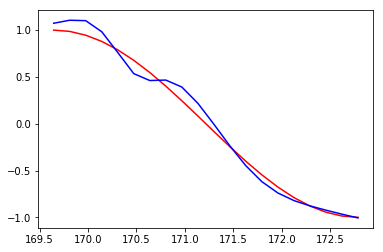

c [[[-0.9834205 ]
  [-1.0036067 ]
  [-0.98891735]
  [-0.91136265]
  [-0.7856846 ]
  [-0.6755732 ]
  [-0.5634834 ]
  [-0.40690526]
  [-0.24496463]
  [-0.07397154]
  [ 0.13589123]
  [ 0.31668362]
  [ 0.450937  ]
  [ 0.5553988 ]
  [ 0.64711916]
  [ 0.736117  ]
  [ 0.82607293]
  [ 0.9162128 ]
  [ 1.0029248 ]
  [ 1.0805042 ]]]
epoch:55  | loss:0.0014223934849724174  


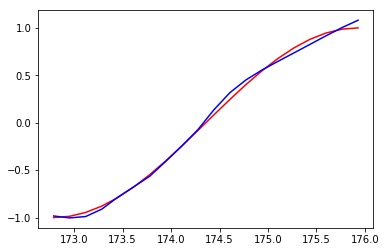

c [[[ 1.0692599 ]
  [ 1.1008272 ]
  [ 1.0951052 ]
  [ 0.97668475]
  [ 0.7581435 ]
  [ 0.5398891 ]
  [ 0.47148436]
  [ 0.47651106]
  [ 0.40147835]
  [ 0.22990721]
  [ 0.01056638]
  [-0.21796069]
  [-0.43124592]
  [-0.6064892 ]
  [-0.73350996]
  [-0.81942105]
  [-0.8792834 ]
  [-0.9269709 ]
  [-0.97081417]
  [-1.0119028 ]]]
epoch:56  | loss:0.007273887749761343  


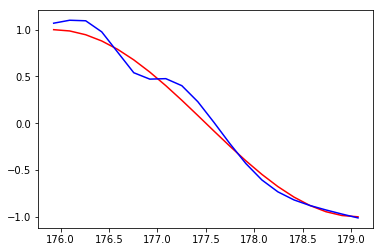

c [[[-0.9911776 ]
  [-1.0141661 ]
  [-1.0059689 ]
  [-0.93672323]
  [-0.8100753 ]
  [-0.6925229 ]
  [-0.5876156 ]
  [-0.44829518]
  [-0.2913041 ]
  [-0.13469326]
  [ 0.07449317]
  [ 0.27060485]
  [ 0.41961133]
  [ 0.534312  ]
  [ 0.6325209 ]
  [ 0.72546875]
  [ 0.8177146 ]
  [ 0.90902066]
  [ 0.9961239 ]
  [ 1.0734648 ]]]
epoch:57  | loss:0.0017475861823186278  


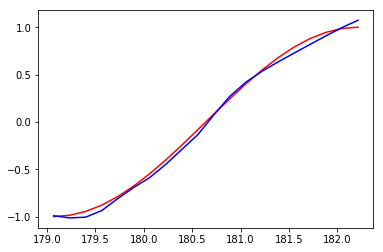

c [[[ 1.0610254 ]
  [ 1.0905148 ]
  [ 1.0801405 ]
  [ 0.95697033]
  [ 0.73907983]
  [ 0.5289751 ]
  [ 0.4662495 ]
  [ 0.46112278]
  [ 0.368678  ]
  [ 0.18605104]
  [-0.03261727]
  [-0.2520389 ]
  [-0.45445597]
  [-0.6216794 ]
  [-0.7439391 ]
  [-0.82711804]
  [-0.885221  ]
  [-0.93151796]
  [-0.9741131 ]
  [-1.014244  ]]]
epoch:58  | loss:0.005821698810905218  


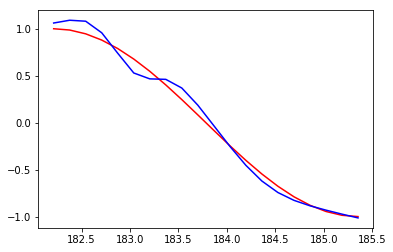

c [[[-0.9896554 ]
  [-1.0113711 ]
  [-1.0041674 ]
  [-0.93723834]
  [-0.8067341 ]
  [-0.67884505]
  [-0.57533014]
  [-0.45186168]
  [-0.30784833]
  [-0.1764471 ]
  [ 0.01396787]
  [ 0.21957988]
  [ 0.38397467]
  [ 0.51043016]
  [ 0.61623985]
  [ 0.7137934 ]
  [ 0.80862844]
  [ 0.9011749 ]
  [ 0.9885447 ]
  [ 1.0653218 ]]]
epoch:59  | loss:0.0025760389398783445  


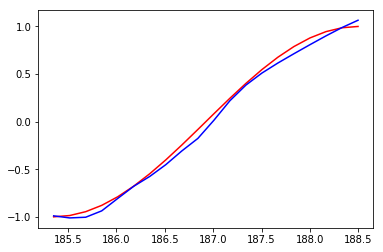

c [[[ 1.0527056 ]
  [ 1.0794417 ]
  [ 1.0637323 ]
  [ 0.93564415]
  [ 0.7189274 ]
  [ 0.5174599 ]
  [ 0.45906234]
  [ 0.4421295 ]
  [ 0.33475232]
  [ 0.14946634]
  [-0.05806237]
  [-0.26008737]
  [-0.44750568]
  [-0.6075739 ]
  [-0.72911555]
  [-0.81407815]
  [-0.8737596 ]
  [-0.9204282 ]
  [-0.96204895]
  [-0.9999431 ]]]
epoch:60  | loss:0.004597011022269726  


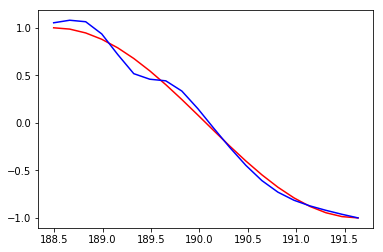

c [[[-0.9709003 ]
  [-0.987654  ]
  [-0.97454774]
  [-0.9014847 ]
  [-0.7665087 ]
  [-0.6362656 ]
  [-0.53447896]
  [-0.4206901 ]
  [-0.290332  ]
  [-0.18200901]
  [-0.01795682]
  [ 0.18644208]
  [ 0.36016336]
  [ 0.49509475]
  [ 0.606567  ]
  [ 0.7074739 ]
  [ 0.80404997]
  [ 0.8972355 ]
  [ 0.98449326]
  [ 1.06051   ]]]
epoch:61  | loss:0.0029079029336571693  


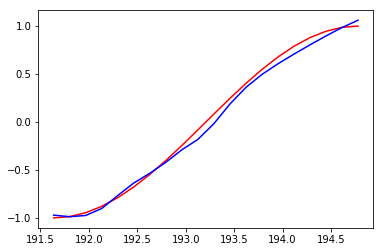

c [[[ 1.0480363 ]
  [ 1.0725102 ]
  [ 1.0529637 ]
  [ 0.9221694 ]
  [ 0.70781595]
  [ 0.5128459 ]
  [ 0.45464134]
  [ 0.4269457 ]
  [ 0.3113914 ]
  [ 0.13208169]
  [-0.0582439 ]
  [-0.24016659]
  [-0.4116745 ]
  [-0.56611204]
  [-0.6911931 ]
  [-0.7832305 ]
  [-0.84914994]
  [-0.8995851 ]
  [-0.9424352 ]
  [-0.9792182 ]]]
epoch:62  | loss:0.003968425560742617  


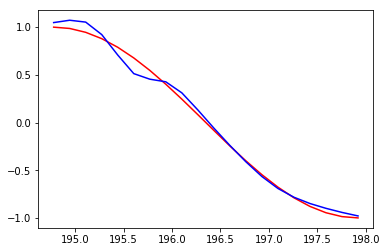

c [[[-0.95475674]
  [-0.9694959 ]
  [-0.95124954]
  [-0.8724795 ]
  [-0.7389829 ]
  [-0.6168541 ]
  [-0.51651585]
  [-0.40020093]
  [-0.27152377]
  [-0.16620082]
  [-0.00230998]
  [ 0.19969791]
  [ 0.37078768]
  [ 0.5038247 ]
  [ 0.61393154]
  [ 0.7136927 ]
  [ 0.8091683 ]
  [ 0.9012485 ]
  [ 0.98738486]
  [ 1.0622492 ]]]
epoch:63  | loss:0.002490282990038395  


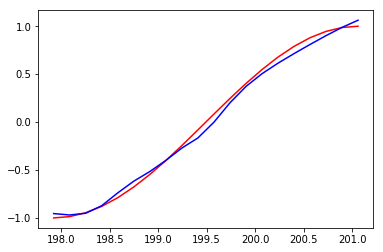

c [[[ 1.049322  ]
  [ 1.0723389 ]
  [ 1.050583  ]
  [ 0.9186876 ]
  [ 0.70639503]
  [ 0.51321614]
  [ 0.44834998]
  [ 0.40612772]
  [ 0.2798082 ]
  [ 0.10229564]
  [-0.07649626]
  [-0.24333978]
  [-0.40094212]
  [-0.5477332 ]
  [-0.6726655 ]
  [-0.76888245]
  [-0.8398249 ]
  [-0.89437306]
  [-0.94005096]
  [-0.9783902 ]]]
epoch:64  | loss:0.0037356759421527386  


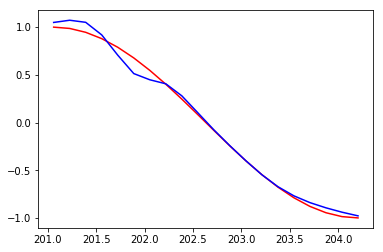

c [[[-0.96050084]
  [-0.97725356]
  [-0.95887506]
  [-0.88018847]
  [-0.7529058 ]
  [-0.6395704 ]
  [-0.5361069 ]
  [-0.4068148 ]
  [-0.26826468]
  [-0.14343718]
  [ 0.04378352]
  [ 0.24430111]
  [ 0.40482536]
  [ 0.528721  ]
  [ 0.6324885 ]
  [ 0.72791934]
  [ 0.82030916]
  [ 0.9100932 ]
  [ 0.99447596]
  [ 1.0679765 ]]]
epoch:65  | loss:0.001299133524298668  


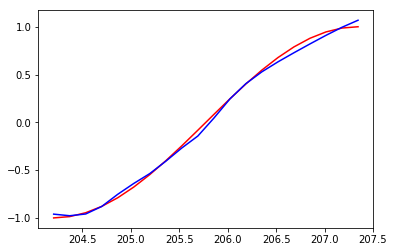

c [[[ 1.0541102 ]
  [ 1.0764123 ]
  [ 1.0541239 ]
  [ 0.9228953 ]
  [ 0.71303403]
  [ 0.5188645 ]
  [ 0.4434103 ]
  [ 0.38524053]
  [ 0.24629453]
  [ 0.06564903]
  [-0.10857151]
  [-0.2671087 ]
  [-0.4158051 ]
  [-0.5563307 ]
  [-0.6790525 ]
  [-0.7760504 ]
  [-0.8491353 ]
  [-0.9062227 ]
  [-0.9545264 ]
  [-0.9955113 ]]]
epoch:66  | loss:0.0035973316989839077  


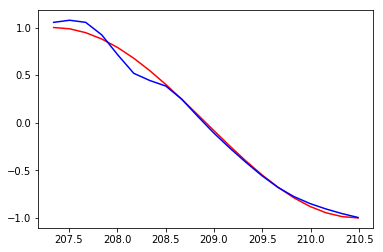

c [[[-0.9773519 ]
  [-0.99601364]
  [-0.9787755 ]
  [-0.901371  ]
  [-0.7786086 ]
  [-0.6696298 ]
  [-0.5601676 ]
  [-0.4154025 ]
  [-0.26385418]
  [-0.11364582]
  [ 0.09166157]
  [ 0.2866725 ]
  [ 0.4362274 ]
  [ 0.55141366]
  [ 0.6492342 ]
  [ 0.740618  ]
  [ 0.8301333 ]
  [ 0.9178165 ]
  [ 1.0006678 ]
  [ 1.0731282 ]]]
epoch:67  | loss:0.0009454440441913903  


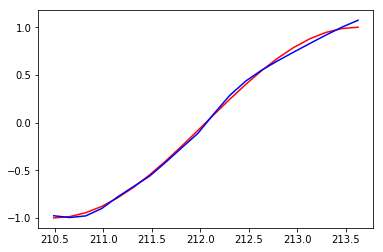

c [[[ 1.0583673 ]
  [ 1.0809116 ]
  [ 1.0604808 ]
  [ 0.9330079 ]
  [ 0.727972  ]
  [ 0.53390974]
  [ 0.44964707]
  [ 0.3822059 ]
  [ 0.23747331]
  [ 0.05608729]
  [-0.1150386 ]
  [-0.26884976]
  [-0.41259128]
  [-0.55032885]
  [-0.6738081 ]
  [-0.7739681 ]
  [-0.8508473 ]
  [-0.9113708 ]
  [-0.96255654]
  [-1.005871  ]]]
epoch:68  | loss:0.0033925711177289486  


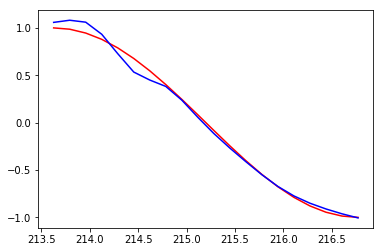

c [[[-0.9840236 ]
  [-1.0020746 ]
  [-0.98339486]
  [-0.9050033 ]
  [-0.7857733 ]
  [-0.6803647 ]
  [-0.5653732 ]
  [-0.40907404]
  [-0.25005415]
  [-0.08459333]
  [ 0.12656334]
  [ 0.31481805]
  [ 0.4563826 ]
  [ 0.56567264]
  [ 0.6594882 ]
  [ 0.74807656]
  [ 0.83556354]
  [ 0.92174447]
  [ 1.0035405 ]
  [ 1.0754262 ]]]
epoch:69  | loss:0.0011790862772613764  


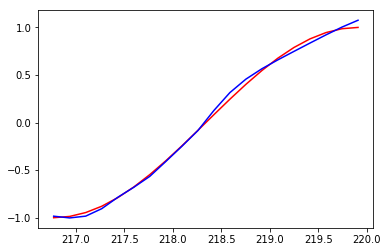

c [[[ 1.0597261 ]
  [ 1.0833677 ]
  [ 1.0664934 ]
  [ 0.94505763]
  [ 0.7469773 ]
  [ 0.5555832 ]
  [ 0.46619028]
  [ 0.39627916]
  [ 0.25192547]
  [ 0.07187441]
  [-0.09706147]
  [-0.2486776 ]
  [-0.390383  ]
  [-0.52784777]
  [-0.6543238 ]
  [-0.7596325 ]
  [-0.84178543]
  [-0.9065144 ]
  [-0.960576  ]
  [-1.0054686 ]]]
epoch:70  | loss:0.003045357298105955  


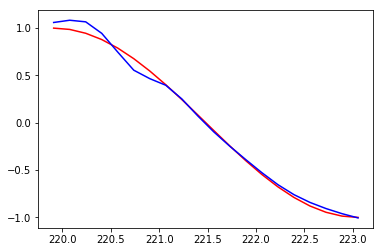

c [[[-0.982192  ]
  [-0.9984229 ]
  [-0.97682554]
  [-0.8962024 ]
  [-0.7794841 ]
  [-0.67603976]
  [-0.5564798 ]
  [-0.3942355 ]
  [-0.23472148]
  [-0.06676853]
  [ 0.14275455]
  [ 0.3262595 ]
  [ 0.46375585]
  [ 0.5702129 ]
  [ 0.6620546 ]
  [ 0.7491646 ]
  [ 0.83546877]
  [ 0.9207208 ]
  [ 1.001842  ]
  [ 1.0734072 ]]]
epoch:71  | loss:0.0013436274603009224  


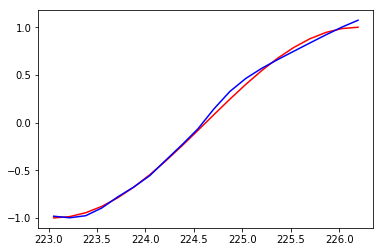

c [[[ 1.056461  ]
  [ 1.0811466 ]
  [ 1.0672615 ]
  [ 0.9511801 ]
  [ 0.7599932 ]
  [ 0.5731834 ]
  [ 0.48134872]
  [ 0.40900633]
  [ 0.26229224]
  [ 0.07895279]
  [-0.09267193]
  [-0.2461985 ]
  [-0.3894822 ]
  [-0.528712  ]
  [-0.6570893 ]
  [-0.7640351 ]
  [-0.8473753 ]
  [-0.9129261 ]
  [-0.96756375]
  [-1.0127572 ]]]
epoch:72  | loss:0.0026325176004320383  


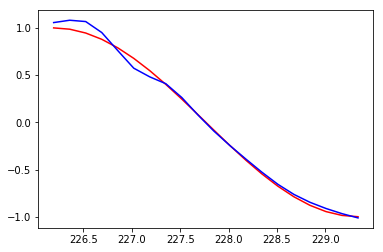

c [[[-0.9892503 ]
  [-1.0049311 ]
  [-0.981977  ]
  [-0.8988743 ]
  [-0.7788007 ]
  [-0.6712786 ]
  [-0.547714  ]
  [-0.3838833 ]
  [-0.22725186]
  [-0.06676778]
  [ 0.13755599]
  [ 0.3200592 ]
  [ 0.45793936]
  [ 0.5647974 ]
  [ 0.65676653]
  [ 0.7437388 ]
  [ 0.82971895]
  [ 0.91454947]
  [ 0.99527633]
  [ 1.0665717 ]]]
epoch:73  | loss:0.001284984638914466  


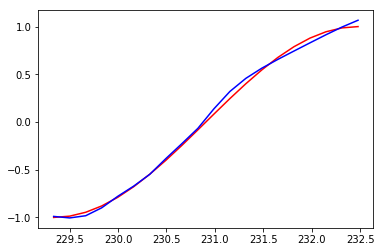

c [[[ 1.0485779 ]
  [ 1.0736406 ]
  [ 1.0611496 ]
  [ 0.948557  ]
  [ 0.763504  ]
  [ 0.58281565]
  [ 0.49125746]
  [ 0.4155033 ]
  [ 0.26290253]
  [ 0.07236335]
  [-0.10544056]
  [-0.26360038]
  [-0.41095304]
  [-0.5532016 ]
  [-0.6818868 ]
  [-0.7867044 ]
  [-0.8671192 ]
  [-0.930228  ]
  [-0.9833509 ]
  [-1.0278922 ]]]
epoch:74  | loss:0.0021757979411631823  


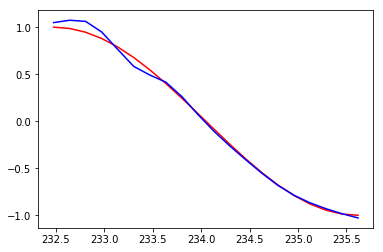

c [[[-1.0013992 ]
  [-1.0170782 ]
  [-0.9940002 ]
  [-0.9085364 ]
  [-0.78139293]
  [-0.6666419 ]
  [-0.5407061 ]
  [-0.3787205 ]
  [-0.22613466]
  [-0.0786483 ]
  [ 0.11783224]
  [ 0.3016286 ]
  [ 0.44292486]
  [ 0.55246735]
  [ 0.64607084]
  [ 0.7338774 ]
  [ 0.82015574]
  [ 0.9049566 ]
  [ 0.98547935]
  [ 1.0565461 ]]]
epoch:75  | loss:0.0011891277972608805  


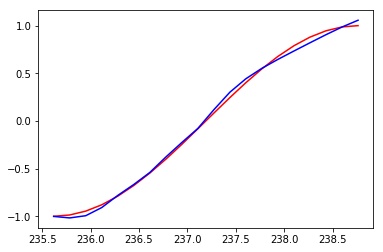

c [[[ 1.0383807 ]
  [ 1.0634118 ]
  [ 1.051565  ]
  [ 0.9417907 ]
  [ 0.76300406]
  [ 0.5901448 ]
  [ 0.502253  ]
  [ 0.42694974]
  [ 0.27292478]
  [ 0.0796147 ]
  [-0.10101718]
  [-0.2620191 ]
  [-0.41263187]
  [-0.55781627]
  [-0.6879395 ]
  [-0.7927072 ]
  [-0.872329  ]
  [-0.9345128 ]
  [-0.98680216]
  [-1.0305845 ]]]
epoch:76  | loss:0.001811986556276679  


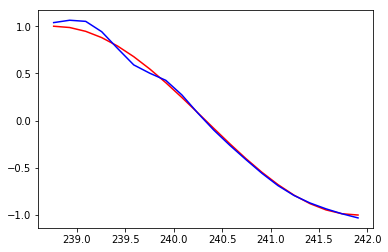

c [[[-1.0002272 ]
  [-1.0144677 ]
  [-0.99009454]
  [-0.9028132 ]
  [-0.77273303]
  [-0.6557085 ]
  [-0.53096133]
  [-0.373723  ]
  [-0.22602141]
  [-0.09151265]
  [ 0.09594217]
  [ 0.2808175 ]
  [ 0.42596215]
  [ 0.53865373]
  [ 0.63425833]
  [ 0.72316074]
  [ 0.8099197 ]
  [ 0.8948097 ]
  [ 0.9751991 ]
  [ 1.0460263 ]]]
epoch:77  | loss:0.0011749627301469445  


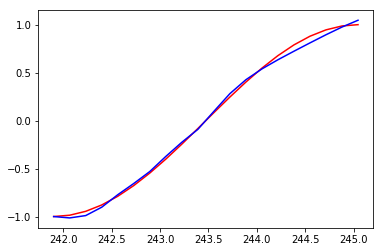

c [[[ 1.0283223 ]
  [ 1.0531377 ]
  [ 1.0413694 ]
  [ 0.93374777]
  [ 0.7609657 ]
  [ 0.59644485]
  [ 0.51380825]
  [ 0.44137788]
  [ 0.28978497]
  [ 0.0985316 ]
  [-0.08062007]
  [-0.24150035]
  [-0.39335674]
  [-0.54073447]
  [-0.67355156]
  [-0.78084636]
  [-0.8622848 ]
  [-0.9253903 ]
  [-0.97773474]
  [-1.0207945 ]]]
epoch:78  | loss:0.0015493317041546106  


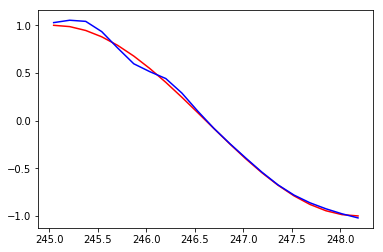

c [[[-0.9903052 ]
  [-1.0029621 ]
  [-0.97713387]
  [-0.88950366]
  [-0.761436  ]
  [-0.6476048 ]
  [-0.52694464]
  [-0.3749349 ]
  [-0.23016676]
  [-0.10290763]
  [ 0.07861894]
  [ 0.26436394]
  [ 0.4124686 ]
  [ 0.5276082 ]
  [ 0.6247559 ]
  [ 0.71448565]
  [ 0.8015546 ]
  [ 0.8864046 ]
  [ 0.96652764]
  [ 1.0369372 ]]]
epoch:79  | loss:0.0012708252761512995  


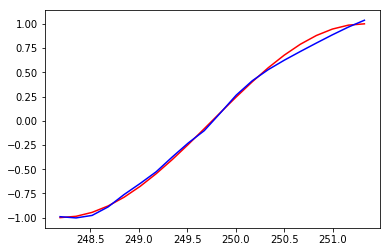

c [[[ 1.0197293 ]
  [ 1.0437357 ]
  [ 1.0304985 ]
  [ 0.9229593 ]
  [ 0.7545334 ]
  [ 0.59699655]
  [ 0.51795197]
  [ 0.4437199 ]
  [ 0.28928635]
  [ 0.09724012]
  [-0.0813569 ]
  [-0.24203631]
  [-0.39480135]
  [-0.5432259 ]
  [-0.6760882 ]
  [-0.78250253]
  [-0.86271405]
  [-0.9246204 ]
  [-0.9758955 ]
  [-1.0180165 ]]]
epoch:80  | loss:0.0013206412550061941  


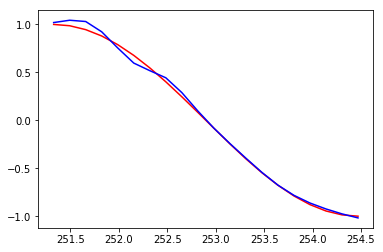

c [[[-0.9891621 ]
  [-1.0021873 ]
  [-0.9772199 ]
  [-0.89122814]
  [-0.76515645]
  [-0.65431076]
  [-0.5380068 ]
  [-0.38926536]
  [-0.24269676]
  [-0.11418262]
  [ 0.06762755]
  [ 0.25511783]
  [ 0.40514416]
  [ 0.5216468 ]
  [ 0.6195616 ]
  [ 0.70959437]
  [ 0.79662806]
  [ 0.8811839 ]
  [ 0.9608086 ]
  [ 1.0305173 ]]]
epoch:81  | loss:0.0013545795809477568  


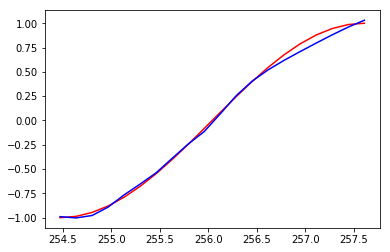

c [[[ 1.0138863 ]
  [ 1.0364038 ]
  [ 1.0203941 ]
  [ 0.9113982 ]
  [ 0.7460736 ]
  [ 0.59405804]
  [ 0.5165147 ]
  [ 0.4363231 ]
  [ 0.2749651 ]
  [ 0.0801675 ]
  [-0.09848142]
  [-0.25904185]
  [-0.41263622]
  [-0.5611532 ]
  [-0.69189125]
  [-0.7948079 ]
  [-0.87159747]
  [-0.9308888 ]
  [-0.98043394]
  [-1.0216389 ]]]
epoch:82  | loss:0.0011425119591876864  


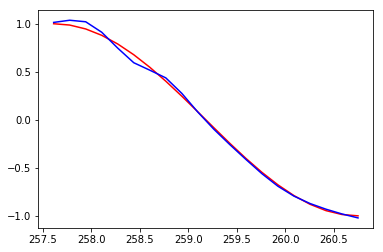

c [[[-0.99174964]
  [-1.0053383 ]
  [-0.98164463]
  [-0.8975457 ]
  [-0.77339315]
  [-0.6656889 ]
  [-0.5534327 ]
  [-0.4061921 ]
  [-0.25555602]
  [-0.12024719]
  [ 0.06639302]
  [ 0.25562266]
  [ 0.40597728]
  [ 0.52236605]
  [ 0.6200144 ]
  [ 0.7096784 ]
  [ 0.79624104]
  [ 0.88021874]
  [ 0.9591509 ]
  [ 1.02801   ]]]
epoch:83  | loss:0.0013669875916093588  


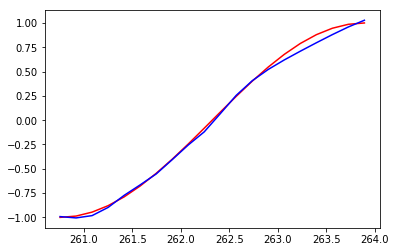

c [[[ 1.0121403 ]
  [ 1.0331022 ]
  [ 1.0145844 ]
  [ 0.9045733 ]
  [ 0.7424611 ]
  [ 0.59541404]
  [ 0.51899195]
  [ 0.4350303 ]
  [ 0.27124676]
  [ 0.07852927]
  [-0.09631453]
  [-0.2541508 ]
  [-0.4067313 ]
  [-0.55513245]
  [-0.68599725]
  [-0.78906524]
  [-0.8659221 ]
  [-0.9251145 ]
  [-0.9743303 ]
  [-1.0149683 ]]]
epoch:84  | loss:0.001027913996949792  


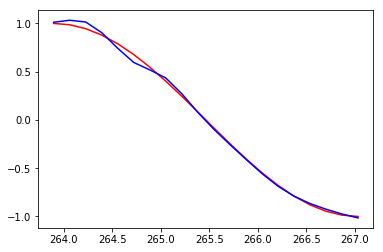

c [[[-0.98353314]
  [-0.9957493 ]
  [-0.9709062 ]
  [-0.8875214 ]
  [-0.7685893 ]
  [-0.66782784]
  [-0.5595627 ]
  [-0.41260248]
  [-0.25891298]
  [-0.11573014]
  [ 0.07663471]
  [ 0.26605552]
  [ 0.41477686]
  [ 0.5295623 ]
  [ 0.6259491 ]
  [ 0.7146204 ]
  [ 0.80031806]
  [ 0.8834805 ]
  [ 0.9615937 ]
  [ 1.0295691 ]]]
epoch:85  | loss:0.0011941574048250914  


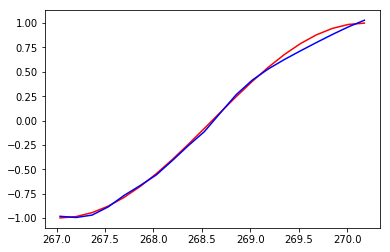

c [[[ 1.0140228 ]
  [ 1.0336065 ]
  [ 1.0130366 ]
  [ 0.9024694 ]
  [ 0.7434828 ]
  [ 0.600573  ]
  [ 0.52437556]
  [ 0.43742412]
  [ 0.2731393 ]
  [ 0.08432189]
  [-0.08533259]
  [-0.23937513]
  [-0.39007705]
  [-0.5383194 ]
  [-0.6704224 ]
  [-0.7753573 ]
  [-0.853897  ]
  [-0.9141234 ]
  [-0.9635921 ]
  [-1.0036588 ]]]
epoch:86  | loss:0.0010341749293729663  


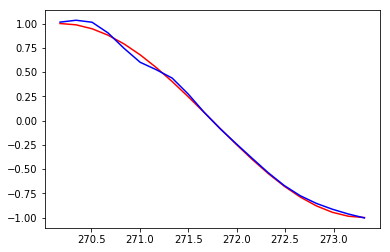

c [[[-0.97325134]
  [-0.98372626]
  [-0.9569919 ]
  [-0.8738872 ]
  [-0.76060176]
  [-0.66629094]
  [-0.5601907 ]
  [-0.41192555]
  [-0.25540644]
  [-0.10545367]
  [ 0.09117234]
  [ 0.27986696]
  [ 0.42651072]
  [ 0.5394473 ]
  [ 0.63442135]
  [ 0.7219801 ]
  [ 0.8067436 ]
  [ 0.88904345]
  [ 0.9662975 ]
  [ 1.0333425 ]]]
epoch:87  | loss:0.0010507924016565084  


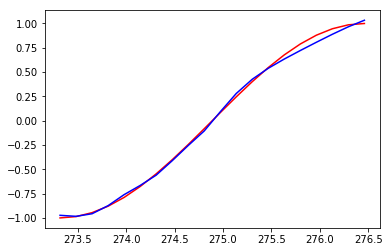

c [[[ 1.017233  ]
  [ 1.0352676 ]
  [ 1.0121716 ]
  [ 0.900396  ]
  [ 0.743682  ]
  [ 0.6035249 ]
  [ 0.525334  ]
  [ 0.43113753]
  [ 0.26102915]
  [ 0.07114103]
  [-0.09755677]
  [-0.25109342]
  [-0.40237844]
  [-0.5507682 ]
  [-0.68150985]
  [-0.78417313]
  [-0.86050224]
  [-0.9190322 ]
  [-0.9672849 ]
  [-1.0064498 ]]]
epoch:88  | loss:0.0009268663707189262  


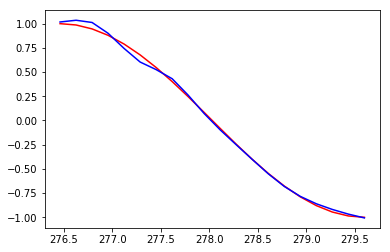

c [[[-0.97646403]
  [-0.98673904]
  [-0.95964956]
  [-0.8762666 ]
  [-0.763082  ]
  [-0.66910315]
  [-0.56243646]
  [-0.41178504]
  [-0.25159377]
  [-0.0972299 ]
  [ 0.10155109]
  [ 0.29009387]
  [ 0.435926  ]
  [ 0.5480168 ]
  [ 0.64223397]
  [ 0.72910285]
  [ 0.8131927 ]
  [ 0.89480126]
  [ 0.9712825 ]
  [ 1.0374156 ]]]
epoch:89  | loss:0.0009536873549222946  


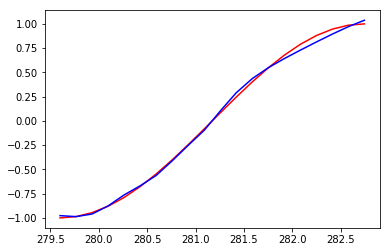

c [[[ 1.0203855 ]
  [ 1.0367332 ]
  [ 1.0111572 ]
  [ 0.89835787]
  [ 0.74399173]
  [ 0.60650647]
  [ 0.52643144]
  [ 0.42535105]
  [ 0.24943468]
  [ 0.05762985]
  [-0.11150338]
  [-0.2660051 ]
  [-0.41904324]
  [-0.5680624 ]
  [-0.69730306]
  [-0.7973087 ]
  [-0.87108123]
  [-0.9277402 ]
  [-0.97481704]
  [-1.013327  ]]]
epoch:90  | loss:0.0009711736929602921  


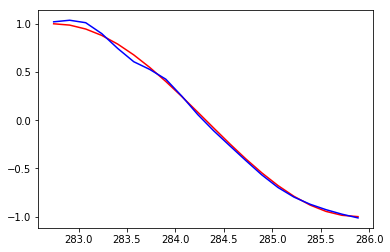

c [[[-0.98109597]
  [-0.99121946]
  [-0.96391565]
  [-0.87977666]
  [-0.7648111 ]
  [-0.6691085 ]
  [-0.5610307 ]
  [-0.40852168]
  [-0.24599552]
  [-0.09067649]
  [ 0.107905  ]
  [ 0.29651064]
  [ 0.44247895]
  [ 0.5545291 ]
  [ 0.64854306]
  [ 0.73509294]
  [ 0.8187681 ]
  [ 0.89985853]
  [ 0.9757424 ]
  [ 1.0411599 ]]]
epoch:91  | loss:0.0008998264675028622  


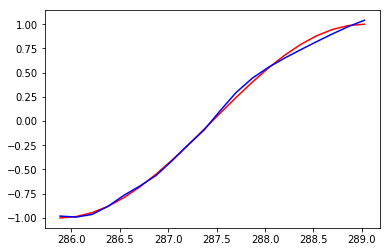

c [[[ 1.0232766 ]
  [ 1.0383909 ]
  [ 1.0114739 ]
  [ 0.899003  ]
  [ 0.74793005]
  [ 0.6141366 ]
  [ 0.5345876 ]
  [ 0.43238184]
  [ 0.2570221 ]
  [ 0.06765759]
  [-0.09905225]
  [-0.25240818]
  [-0.4056483 ]
  [-0.55606675]
  [-0.68748516]
  [-0.78972876]
  [-0.86527085]
  [-0.92304647]
  [-0.9706241 ]
  [-1.0090708 ]]]
epoch:92  | loss:0.000832395744509995  


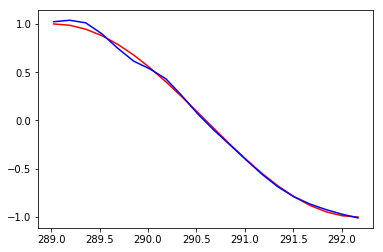

c [[[-0.976139  ]
  [-0.985347  ]
  [-0.95708495]
  [-0.8726159 ]
  [-0.75855225]
  [-0.66315377]
  [-0.55428445]
  [-0.4011562 ]
  [-0.2384384 ]
  [-0.08553958]
  [ 0.11054552]
  [ 0.2991165 ]
  [ 0.445872  ]
  [ 0.55851114]
  [ 0.6527808 ]
  [ 0.7393314 ]
  [ 0.8228242 ]
  [ 0.9035925 ]
  [ 0.9790438 ]
  [ 1.0439281 ]]]
epoch:93  | loss:0.0008895074715837836  


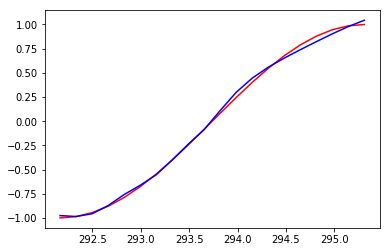

c [[[ 1.024916  ]
  [ 1.0390267 ]
  [ 1.0109606 ]
  [ 0.89893305]
  [ 0.7511027 ]
  [ 0.6210141 ]
  [ 0.5423285 ]
  [ 0.43942854]
  [ 0.26463124]
  [ 0.0772087 ]
  [-0.08772525]
  [-0.24041653]
  [-0.3941104 ]
  [-0.5460341 ]
  [-0.67964983]
  [-0.78410184]
  [-0.8613703 ]
  [-0.92027533]
  [-0.96846294]
  [-1.0071157 ]]]
epoch:94  | loss:0.0007981591625139117  


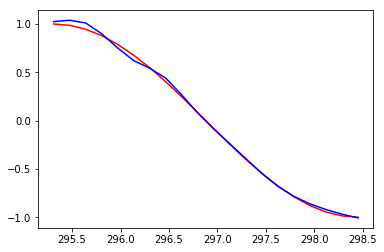

c [[[-0.97637904]
  [-0.98610127]
  [-0.9583599 ]
  [-0.87430006]
  [-0.7593399 ]
  [-0.6619326 ]
  [-0.55197084]
  [-0.3988933 ]
  [-0.23550647]
  [-0.08685154]
  [ 0.10498568]
  [ 0.29442728]
  [ 0.44363952]
  [ 0.5582174 ]
  [ 0.6536608 ]
  [ 0.7407985 ]
  [ 0.8244786 ]
  [ 0.90514994]
  [ 0.98028386]
  [ 1.0446184 ]]]
epoch:95  | loss:0.0008202165481634438  


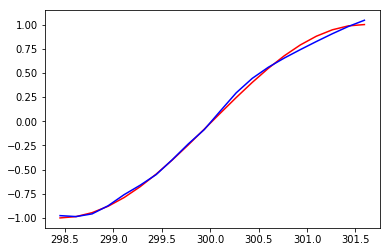

c [[[ 1.0242853 ]
  [ 1.0370042 ]
  [ 1.0069175 ]
  [ 0.8944677 ]
  [ 0.7492416 ]
  [ 0.6222073 ]
  [ 0.5432017 ]
  [ 0.4359753 ]
  [ 0.25718164]
  [ 0.06787923]
  [-0.09855625]
  [-0.25335264]
  [-0.40950465]
  [-0.5626975 ]
  [-0.69566584]
  [-0.79834235]
  [-0.87378895]
  [-0.9314293 ]
  [-0.9790534 ]
  [-1.0178862 ]]]
epoch:96  | loss:0.0007471740245819092  


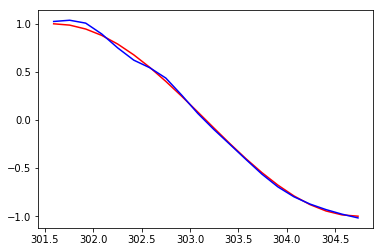

c [[[-0.9874376 ]
  [-0.9990399 ]
  [-0.9735267 ]
  [-0.8901105 ]
  [-0.7704406 ]
  [-0.6670652 ]
  [-0.5553746 ]
  [-0.40293726]
  [-0.2378285 ]
  [-0.09384304]
  [ 0.09218675]
  [ 0.28314057]
  [ 0.43633506]
  [ 0.55414176]
  [ 0.6516124 ]
  [ 0.73988855]
  [ 0.8241024 ]
  [ 0.90488756]
  [ 0.97981954]
  [ 1.0436431 ]]]
epoch:97  | loss:0.000722247757948935  


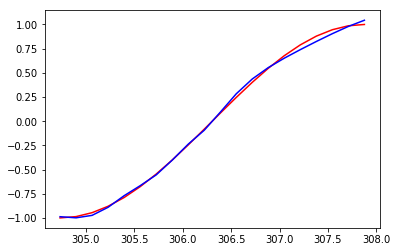

c [[[ 1.0225278 ]
  [ 1.0337254 ]
  [ 1.0016932 ]
  [ 0.889112  ]
  [ 0.7468122 ]
  [ 0.62338233]
  [ 0.54534864]
  [ 0.43632004]
  [ 0.25680736]
  [ 0.06880856]
  [-0.09639806]
  [-0.25101504]
  [-0.4078229 ]
  [-0.562031  ]
  [-0.6960161 ]
  [-0.79950416]
  [-0.8755121 ]
  [-0.93352604]
  [-0.98146594]
  [-1.0207002 ]]]
epoch:98  | loss:0.0006872782250866294  


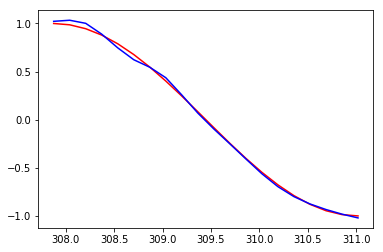

c [[[-0.98895955]
  [-1.001041  ]
  [-0.9764826 ]
  [-0.89371103]
  [-0.7722446 ]
  [-0.66585237]
  [-0.5534663 ]
  [-0.40256363]
  [-0.23726219]
  [-0.09831667]
  [ 0.08064687]
  [ 0.27199626]
  [ 0.4287851 ]
  [ 0.54975235]
  [ 0.64927566]
  [ 0.73872375]
  [ 0.8235191 ]
  [ 0.90445817]
  [ 0.979234  ]
  [ 1.0426106 ]]]
epoch:99  | loss:0.0006868777563795447  


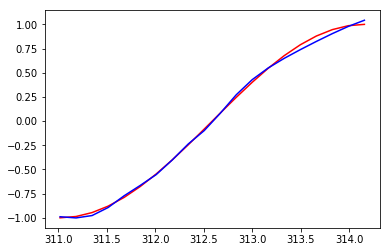

c [[[ 1.0210832 ]
  [ 1.0309864 ]
  [ 0.99740684]
  [ 0.8851278 ]
  [ 0.7459762 ]
  [ 0.6263728 ]
  [ 0.55015755]
  [ 0.4418232 ]
  [ 0.26512817]
  [ 0.08209714]
  [-0.0783772 ]
  [-0.22962418]
  [-0.38452578]
  [-0.5392059 ]
  [-0.67615354]
  [-0.78362393]
  [-0.8631427 ]
  [-0.92355585]
  [-0.9728004 ]
  [-1.0124885 ]]]
epoch:100  | loss:0.0006674537435173988  


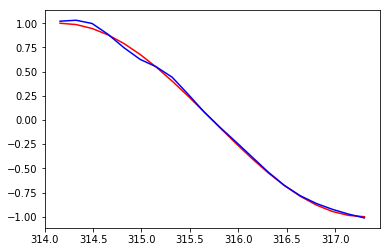

c [[[-0.9823209 ]
  [-0.9940424 ]
  [-0.9692719 ]
  [-0.8870586 ]
  [-0.7668018 ]
  [-0.6606426 ]
  [-0.54843426]
  [-0.3990692 ]
  [-0.23417228]
  [-0.09946379]
  [ 0.07253984]
  [ 0.2632937 ]
  [ 0.4228792 ]
  [ 0.54654276]
  [ 0.6478553 ]
  [ 0.7383177 ]
  [ 0.82356703]
  [ 0.90458107]
  [ 0.9791335 ]
  [ 1.041983  ]]]
epoch:101  | loss:0.0006566510419361293  


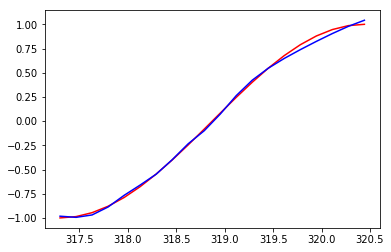

c [[[ 1.0197756 ]
  [ 1.0281162 ]
  [ 0.9922458 ]
  [ 0.8794112 ]
  [ 0.74246013]
  [ 0.62513804]
  [ 0.5478951 ]
  [ 0.43498573]
  [ 0.25567475]
  [ 0.07360122]
  [-0.08535978]
  [-0.2359314 ]
  [-0.3908835 ]
  [-0.5455053 ]
  [-0.6819004 ]
  [-0.78855443]
  [-0.8673011 ]
  [-0.92713404]
  [-0.9760014 ]
  [-1.0155139 ]]]
epoch:102  | loss:0.0005782509688287973  


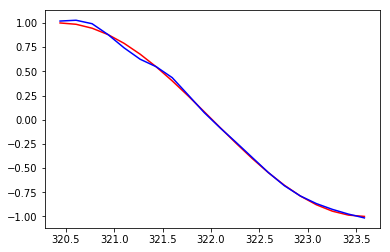

c [[[-0.98656666]
  [-0.99907196]
  [-0.9753065 ]
  [-0.8937762 ]
  [-0.771989  ]
  [-0.6632082 ]
  [-0.5502453 ]
  [-0.40143782]
  [-0.23495534]
  [-0.10136676]
  [ 0.06564873]
  [ 0.25609502]
  [ 0.41828105]
  [ 0.5444354 ]
  [ 0.6473831 ]
  [ 0.73874843]
  [ 0.82437897]
  [ 0.90539443]
  [ 0.9796543 ]
  [ 1.0418599 ]]]
epoch:103  | loss:0.0006481226300820708  


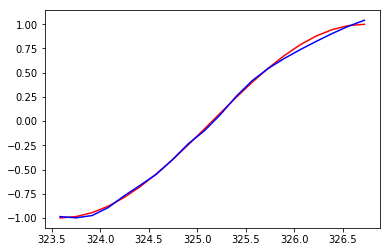

c [[[ 1.0190818 ]
  [ 1.0256101 ]
  [ 0.98727226]
  [ 0.8738084 ]
  [ 0.7387886 ]
  [ 0.6231265 ]
  [ 0.5438844 ]
  [ 0.4251468 ]
  [ 0.2421889 ]
  [ 0.06022835]
  [-0.09806331]
  [-0.24878758]
  [-0.40442514]
  [-0.5588697 ]
  [-0.69375205]
  [-0.7982893 ]
  [-0.87513685]
  [-0.9336189 ]
  [-0.9816724 ]
  [-1.0208378 ]]]
epoch:104  | loss:0.0005786046385765076  


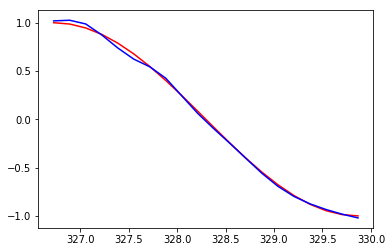

c [[[-0.9898659 ]
  [-1.0024875 ]
  [-0.9791956 ]
  [-0.89797616]
  [-0.775146  ]
  [-0.6649256 ]
  [-0.5517363 ]
  [-0.40310627]
  [-0.23490542]
  [-0.10053587]
  [ 0.06436369]
  [ 0.2546512 ]
  [ 0.41821504]
  [ 0.5456827 ]
  [ 0.64944005]
  [ 0.7411859 ]
  [ 0.82688665]
  [ 0.90773976]
  [ 0.9816288 ]
  [ 1.0432531 ]]]
epoch:105  | loss:0.0006251263548620045  


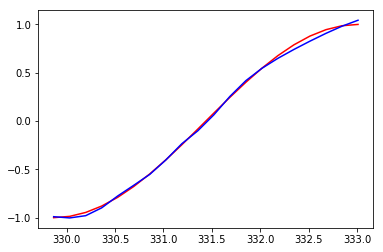

c [[[ 1.0202525 ]
  [ 1.0255444 ]
  [ 0.9859941 ]
  [ 0.87303793]
  [ 0.74058914]
  [ 0.62722135]
  [ 0.5478311 ]
  [ 0.42818356]
  [ 0.24686605]
  [ 0.06901065]
  [-0.08507103]
  [-0.23265538]
  [-0.3864524 ]
  [-0.54087377]
  [-0.6775482 ]
  [-0.7846947 ]
  [-0.8639065 ]
  [-0.92398703]
  [-0.97278386]
  [-1.011924  ]]]
epoch:106  | loss:0.0005428825388662517  


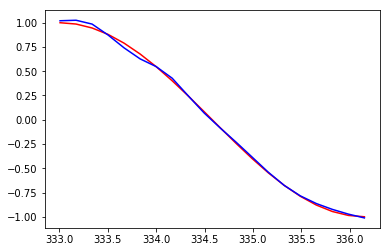

c [[[-0.98096573]
  [-0.9924301 ]
  [-0.9679544 ]
  [-0.8868114 ]
  [-0.76712275]
  [-0.660547  ]
  [-0.54878855]
  [-0.40025362]
  [-0.231177  ]
  [-0.09557965]
  [ 0.06962442]
  [ 0.25971496]
  [ 0.42314655]
  [ 0.5504747 ]
  [ 0.6540418 ]
  [ 0.7455441 ]
  [ 0.83094704]
  [ 0.9114424 ]
  [ 0.9849067 ]
  [ 1.0460095 ]]]
epoch:107  | loss:0.0005513179930858314  


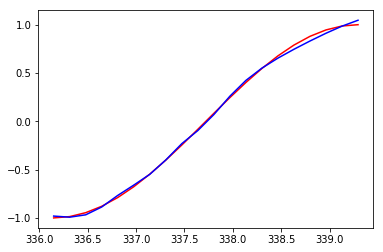

c [[[ 1.0223694 ]
  [ 1.0267617 ]
  [ 0.98624456]
  [ 0.8737509 ]
  [ 0.7434629 ]
  [ 0.63149905]
  [ 0.5505463 ]
  [ 0.42797604]
  [ 0.2456977 ]
  [ 0.06908196]
  [-0.08351725]
  [-0.2303591 ]
  [-0.3841729 ]
  [-0.5388732 ]
  [-0.6757786 ]
  [-0.7830633 ]
  [-0.86233604]
  [-0.92238   ]
  [-0.9710232 ]
  [-1.0098624 ]]]
epoch:108  | loss:0.0005342501681298018  


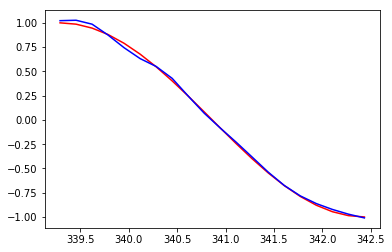

c [[[-0.98058236]
  [-0.9921272 ]
  [-0.96771157]
  [-0.8870797 ]
  [-0.768616  ]
  [-0.6632657 ]
  [-0.5521208 ]
  [-0.40306395]
  [-0.23164028]
  [-0.09311035]
  [ 0.07369483]
  [ 0.26428154]
  [ 0.42780367]
  [ 0.55504286]
  [ 0.65841866]
  [ 0.7496778 ]
  [ 0.83477354]
  [ 0.91489875]
  [ 0.98792005]
  [ 1.0484678 ]]]
epoch:109  | loss:0.0005147682968527079  


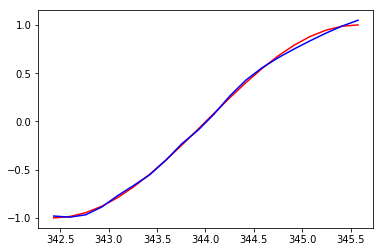

c [[[ 1.0238788 ]
  [ 1.02718   ]
  [ 0.9854332 ]
  [ 0.8731489 ]
  [ 0.7446586 ]
  [ 0.6334201 ]
  [ 0.54957855]
  [ 0.42140195]
  [ 0.23473892]
  [ 0.05572605]
  [-0.09909928]
  [-0.24875751]
  [-0.40538096]
  [-0.56077015]
  [-0.695601  ]
  [-0.79945743]
  [-0.8755114 ]
  [-0.9332528 ]
  [-0.98055923]
  [-1.0188634 ]]]
epoch:110  | loss:0.000523707247339189  


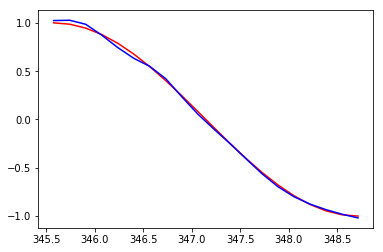

c [[[-0.9878067 ]
  [-0.99977756]
  [-0.9760541 ]
  [-0.89563847]
  [-0.775643  ]
  [-0.6687509 ]
  [-0.5575347 ]
  [-0.4081568 ]
  [-0.23419681]
  [-0.09269047]
  [ 0.07528207]
  [ 0.2665237 ]
  [ 0.4305893 ]
  [ 0.5581336 ]
  [ 0.6615845 ]
  [ 0.7527498 ]
  [ 0.83765125]
  [ 0.9174975 ]
  [ 0.9901662 ]
  [ 1.0502721 ]]]
epoch:111  | loss:0.0005130401696078479  


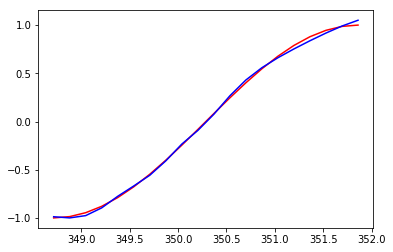

c [[[ 1.0251122 ]
  [ 1.0277469 ]
  [ 0.9857762 ]
  [ 0.87468696]
  [ 0.7488358 ]
  [ 0.6396979 ]
  [ 0.5559468 ]
  [ 0.42772517]
  [ 0.24211958]
  [ 0.06484649]
  [-0.08844255]
  [-0.23734516]
  [-0.39406213]
  [-0.5503619 ]
  [-0.6866783 ]
  [-0.79210305]
  [-0.86941326]
  [-0.9279375 ]
  [-0.9755467 ]
  [-1.013736  ]]]
epoch:112  | loss:0.0004538515058811754  


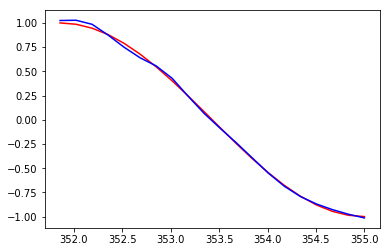

c [[[-0.98165727]
  [-0.99253094]
  [-0.96777666]
  [-0.8871777 ]
  [-0.76910746]
  [-0.6646029 ]
  [-0.55455554]
  [-0.40574172]
  [-0.23151562]
  [-0.08962655]
  [ 0.07766536]
  [ 0.26851574]
  [ 0.4327161 ]
  [ 0.5604373 ]
  [ 0.6639346 ]
  [ 0.7550223 ]
  [ 0.83975196]
  [ 0.919369  ]
  [ 0.99174464]
  [ 1.0515121 ]]]
epoch:113  | loss:0.0004898948245681822  


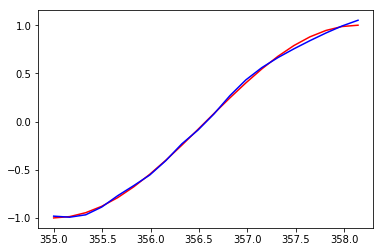

c [[[ 1.0255973 ]
  [ 1.0278078 ]
  [ 0.98574877]
  [ 0.87582874]
  [ 0.7525271 ]
  [ 0.64544004]
  [ 0.56181467]
  [ 0.43360126]
  [ 0.2490232 ]
  [ 0.07341409]
  [-0.07837032]
  [-0.22645512]
  [-0.38314337]
  [-0.5402283 ]
  [-0.6779262 ]
  [-0.784856  ]
  [-0.8633759 ]
  [-0.92263216]
  [-0.9704782 ]
  [-1.0084393 ]]]
epoch:114  | loss:0.000478934874990955  


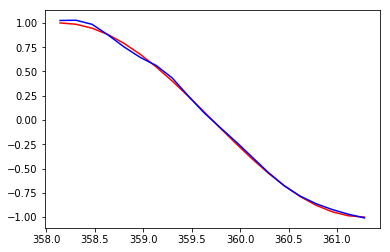

c [[[-0.97825444]
  [-0.9887538 ]
  [-0.9635166 ]
  [-0.8829899 ]
  [-0.76606405]
  [-0.66256726]
  [-0.55306983]
  [-0.4049872 ]
  [-0.23052883]
  [-0.08888897]
  [ 0.07593176]
  [ 0.26602677]
  [ 0.4311076 ]
  [ 0.5598482 ]
  [ 0.6640055 ]
  [ 0.75540376]
  [ 0.84018636]
  [ 0.91965556]
  [ 0.991752  ]
  [ 1.0511001 ]]]
epoch:115  | loss:0.0004772621323354542  


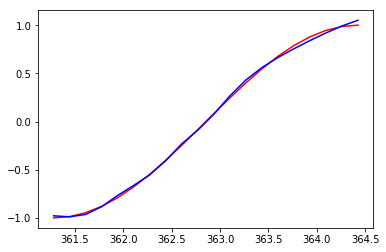

c [[[ 1.0241194 ]
  [ 1.025398  ]
  [ 0.9822741 ]
  [ 0.8726869 ]
  [ 0.7511627 ]
  [ 0.6449387 ]
  [ 0.5590586 ]
  [ 0.4259985 ]
  [ 0.2374664 ]
  [ 0.05935588]
  [-0.09507588]
  [-0.24643715]
  [-0.4061156 ]
  [-0.5637224 ]
  [-0.69908166]
  [-0.8023887 ]
  [-0.87758255]
  [-0.9344633 ]
  [-0.980897  ]
  [-1.0182474 ]]]
epoch:116  | loss:0.0004457734466996044  


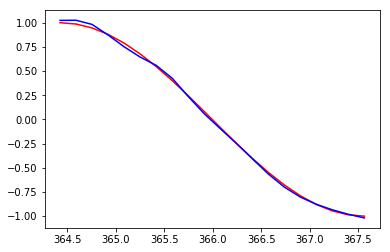

c [[[-0.9867681 ]
  [-0.9978049 ]
  [-0.97331977]
  [-0.8927425 ]
  [-0.77311087]
  [-0.66645145]
  [-0.5562968 ]
  [-0.4089936 ]
  [-0.23363978]
  [-0.09161255]
  [ 0.06994209]
  [ 0.25932834]
  [ 0.42610434]
  [ 0.5566869 ]
  [ 0.66208375]
  [ 0.7541561 ]
  [ 0.83920896]
  [ 0.9186679 ]
  [ 0.9905473 ]
  [ 1.0494922 ]]]
epoch:117  | loss:0.000464817276224494  


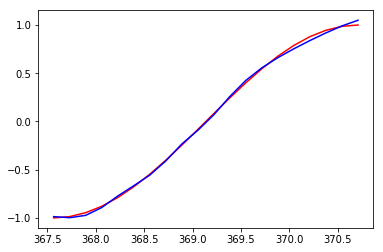

c [[[ 1.0220428 ]
  [ 1.0224514 ]
  [ 0.97876275]
  [ 0.87011194]
  [ 0.75095665]
  [ 0.64672124]
  [ 0.5611613 ]
  [ 0.4279536 ]
  [ 0.24045378]
  [ 0.06419915]
  [-0.0886941 ]
  [-0.23926897]
  [-0.39883563]
  [-0.5569509 ]
  [-0.69328827]
  [-0.797688  ]
  [-0.8737659 ]
  [-0.9311865 ]
  [-0.9777983 ]
  [-1.0150007 ]]]
epoch:118  | loss:0.00038334407145157456  


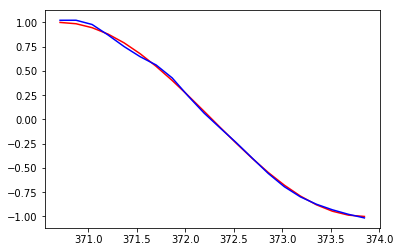

c [[[-0.98211026]
  [-0.9922304 ]
  [-0.9669504 ]
  [-0.8862121 ]
  [-0.7677008 ]
  [-0.6622969 ]
  [-0.5529113 ]
  [-0.40674314]
  [-0.2319439 ]
  [-0.09079587]
  [ 0.0674893 ]
  [ 0.25549945]
  [ 0.42302236]
  [ 0.55471087]
  [ 0.6608896 ]
  [ 0.7533628 ]
  [ 0.83853436]
  [ 0.9179144 ]
  [ 0.9895731 ]
  [ 1.0481619 ]]]
epoch:119  | loss:0.00045101484283804893  


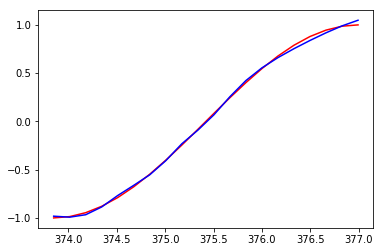

c [[[ 1.0203983 ]
  [ 1.0202935 ]
  [ 0.9764155 ]
  [ 0.8688475 ]
  [ 0.7520057 ]
  [ 0.6497637 ]
  [ 0.56495523]
  [ 0.43290502]
  [ 0.24794585]
  [ 0.07500818]
  [-0.0747188 ]
  [-0.22272629]
  [-0.3807107 ]
  [-0.53908455]
  [-0.67749363]
  [-0.7846865 ]
  [-0.86321795]
  [-0.9222725 ]
  [-0.9696625 ]
  [-1.0068654 ]]]
epoch:120  | loss:0.00041813115240074694  


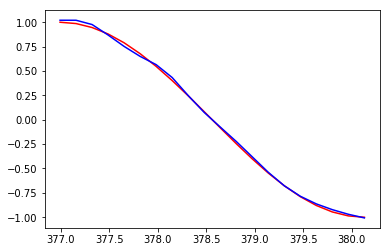

c [[[-0.9764323 ]
  [-0.9861864 ]
  [-0.96041584]
  [-0.88008654]
  [-0.7638302 ]
  [-0.6604587 ]
  [-0.55183995]
  [-0.40620485]
  [-0.23121533]
  [-0.08999833]
  [ 0.06611854]
  [ 0.25298396]
  [ 0.42097262]
  [ 0.5534568 ]
  [ 0.66017866]
  [ 0.75290537]
  [ 0.83809686]
  [ 0.9173192 ]
  [ 0.9886787 ]
  [ 1.0468171 ]]]
epoch:121  | loss:0.00045317300828173757  


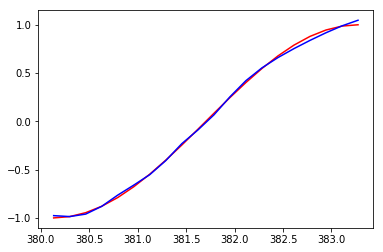

c [[[ 1.0184181 ]
  [ 1.017401  ]
  [ 0.9724338 ]
  [ 0.86502755]
  [ 0.7494161 ]
  [ 0.6472734 ]
  [ 0.55967164]
  [ 0.42263854]
  [ 0.23405737]
  [ 0.05911708]
  [-0.0927818 ]
  [-0.24346836]
  [-0.4037096 ]
  [-0.56211567]
  [-0.69814765]
  [-0.80197936]
  [-0.87751424]
  [-0.9344891 ]
  [-0.98070717]
  [-1.0175245 ]]]
epoch:122  | loss:0.0003696387284435332  


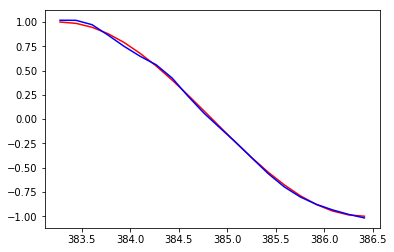

c [[[-0.9863114 ]
  [-0.99697435]
  [-0.97225916]
  [-0.89223564]
  [-0.77386266]
  [-0.6678904 ]
  [-0.5584743 ]
  [-0.41250083]
  [-0.23549062]
  [-0.09190986]
  [ 0.06371221]
  [ 0.25034177]
  [ 0.4191128 ]
  [ 0.5524645 ]
  [ 0.659737  ]
  [ 0.7527021 ]
  [ 0.8379117 ]
  [ 0.91696846]
  [ 0.9880214 ]
  [ 1.0457038 ]]]
epoch:123  | loss:0.00044603273272514343  


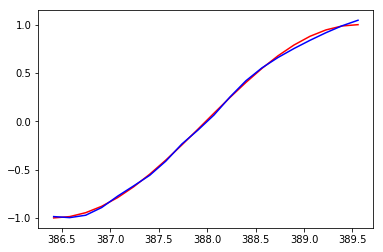

c [[[ 1.0172414 ]
  [ 1.0155058 ]
  [ 0.9701506 ]
  [ 0.86359596]
  [ 0.7497848 ]
  [ 0.6487782 ]
  [ 0.56080306]
  [ 0.4233534 ]
  [ 0.23566768]
  [ 0.06243825]
  [-0.08792062]
  [-0.2375403 ]
  [-0.39724243]
  [-0.55586135]
  [-0.6928112 ]
  [-0.79783106]
  [-0.8744123 ]
  [-0.9321084 ]
  [-0.97871125]
  [-1.0156314 ]]]
epoch:124  | loss:0.0003269189619459212  


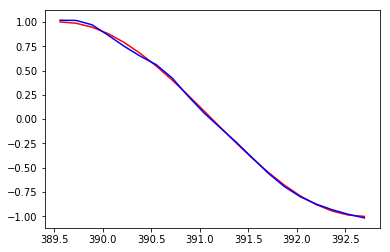

c [[[-0.9828414 ]
  [-0.99273634]
  [-0.9673294 ]
  [-0.8872583 ]
  [-0.77039987]
  [-0.66614413]
  [-0.5571666 ]
  [-0.4108438 ]
  [-0.23302937]
  [-0.08866864]
  [ 0.0668655 ]
  [ 0.2528914 ]
  [ 0.4212533 ]
  [ 0.55435073]
  [ 0.6614008 ]
  [ 0.75413024]
  [ 0.8390646 ]
  [ 0.91782904]
  [ 0.9885683 ]
  [ 1.0459179 ]]]
epoch:125  | loss:0.0004230146296322346  


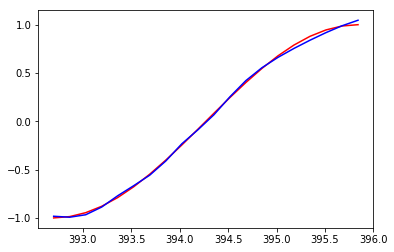

c [[[ 1.0174448 ]
  [ 1.0155382 ]
  [ 0.97045344]
  [ 0.8650518 ]
  [ 0.7531263 ]
  [ 0.65344715]
  [ 0.56578964]
  [ 0.42970383]
  [ 0.24464518]
  [ 0.07459483]
  [-0.07252473]
  [-0.219186  ]
  [-0.37683865]
  [-0.5355645 ]
  [-0.67483294]
  [-0.78310657]
  [-0.86260414]
  [-0.9223096 ]
  [-0.96995735]
  [-1.0070448 ]]]
epoch:126  | loss:0.0003888457431457937  


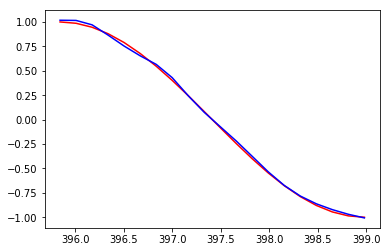

c [[[-0.9766909 ]
  [-0.9860941 ]
  [-0.959973  ]
  [-0.88017714]
  [-0.76592314]
  [-0.6640674 ]
  [-0.55533993]
  [-0.40824527]
  [-0.22949043]
  [-0.08448672]
  [ 0.07080621]
  [ 0.25602677]
  [ 0.42382702]
  [ 0.55659163]
  [ 0.66337883]
  [ 0.75584733]
  [ 0.8404963 ]
  [ 0.9189397 ]
  [ 0.98933125]
  [ 1.0462674 ]]]
epoch:127  | loss:0.00041776042780838907  


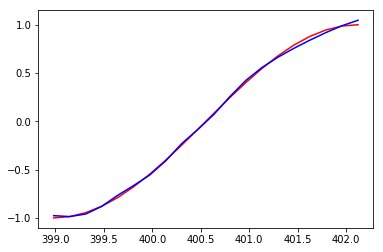

c [[[ 1.0171725 ]
  [ 1.0146625 ]
  [ 0.9688573 ]
  [ 0.8636507 ]
  [ 0.75250304]
  [ 0.6521388 ]
  [ 0.560884  ]
  [ 0.41926154]
  [ 0.22989592]
  [ 0.05687287]
  [-0.09337758]
  [-0.24349605]
  [-0.40390772]
  [-0.5627394 ]
  [-0.6992897 ]
  [-0.8036572 ]
  [-0.8796501 ]
  [-0.93691933]
  [-0.98321176]
  [-1.0198436 ]]]
epoch:128  | loss:0.0003405593743082136  


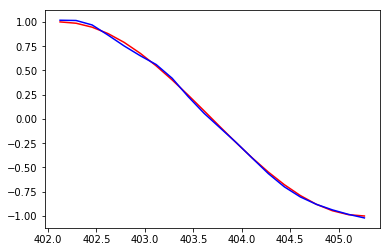

c [[[-0.98794514]
  [-0.9980673 ]
  [-0.97272253]
  [-0.8926563 ]
  [-0.77552664]
  [-0.6704398 ]
  [-0.5602657 ]
  [-0.41220996]
  [-0.23141852]
  [-0.08429286]
  [ 0.07081476]
  [ 0.25572073]
  [ 0.42388654]
  [ 0.55712986]
  [ 0.6641971 ]
  [ 0.7567389 ]
  [ 0.841305  ]
  [ 0.91954947]
  [ 0.98963785]
  [ 1.046194  ]]]
epoch:129  | loss:0.0004127100692130625  


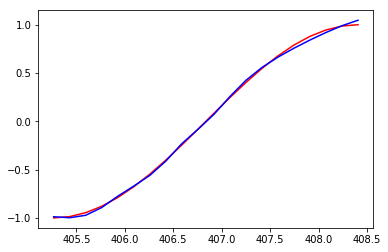

c [[[ 1.0169653 ]
  [ 1.014039  ]
  [ 0.968292  ]
  [ 0.86408186]
  [ 0.75455296]
  [ 0.6551274 ]
  [ 0.56361663]
  [ 0.42207715]
  [ 0.23377451]
  [ 0.06224978]
  [-0.08661442]
  [-0.23564571]
  [-0.39544097]
  [-0.554533  ]
  [-0.6921886 ]
  [-0.7979809 ]
  [-0.87521946]
  [-0.93333924]
  [-0.9800552 ]
  [-1.0167273 ]]]
epoch:130  | loss:0.0002866005233954638  


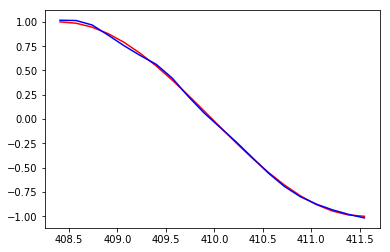

c [[[-0.9829536 ]
  [-0.99201626]
  [-0.9656826 ]
  [-0.88535076]
  [-0.7696951 ]
  [-0.66625905]
  [-0.55643916]
  [-0.40834606]
  [-0.22757208]
  [-0.08063444]
  [ 0.07358661]
  [ 0.25762558]
  [ 0.4254787 ]
  [ 0.558637  ]
  [ 0.6656269 ]
  [ 0.7580414 ]
  [ 0.8424289 ]
  [ 0.92045534]
  [ 0.9903034 ]
  [ 1.0466217 ]]]
epoch:131  | loss:0.00039740829379297793  


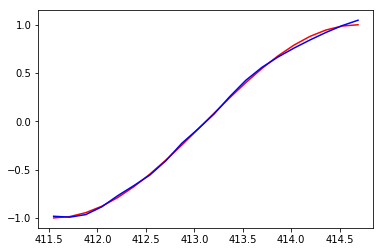

c [[[ 1.0171988 ]
  [ 1.0142903 ]
  [ 0.96900225]
  [ 0.8659371 ]
  [ 0.75811255]
  [ 0.6599283 ]
  [ 0.56887203]
  [ 0.42884314]
  [ 0.24300116]
  [ 0.07422334]
  [-0.07184181]
  [-0.21824571]
  [-0.37618154]
  [-0.53535426]
  [-0.67510515]
  [-0.7838459 ]
  [-0.8637271 ]
  [-0.9236418 ]
  [-0.9712557 ]
  [-1.0080116 ]]]
epoch:132  | loss:0.000353078794432804  


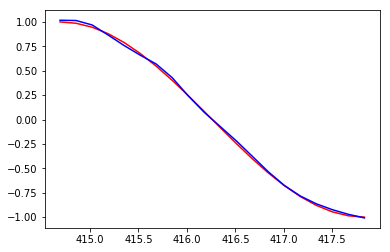

c [[[-0.9768958 ]
  [-0.98562294]
  [-0.9588219 ]
  [-0.87893546]
  [-0.765533  ]
  [-0.6639867 ]
  [-0.55465555]
  [-0.40680113]
  [-0.22605196]
  [-0.07905096]
  [ 0.07402602]
  [ 0.25726545]
  [ 0.42524886]
  [ 0.55878997]
  [ 0.66604114]
  [ 0.7585529 ]
  [ 0.8428837 ]
  [ 0.9207387 ]
  [ 0.99032724]
  [ 1.0462998 ]]]
epoch:133  | loss:0.0004005134687758982  


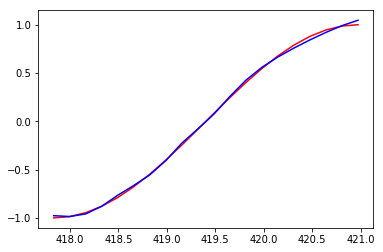

c [[[ 1.0161304 ]
  [ 1.0126038 ]
  [ 0.96655375]
  [ 0.8635892 ]
  [ 0.75633997]
  [ 0.65729094]
  [ 0.5626262 ]
  [ 0.41689277]
  [ 0.22641516]
  [ 0.05410221]
  [-0.09585023]
  [-0.24647859]
  [-0.40767312]
  [-0.5668999 ]
  [-0.7033815 ]
  [-0.8074753 ]
  [-0.8831809 ]
  [-0.9401774 ]
  [-0.98616046]
  [-1.0223997 ]]]
epoch:134  | loss:0.0003466792986728251  


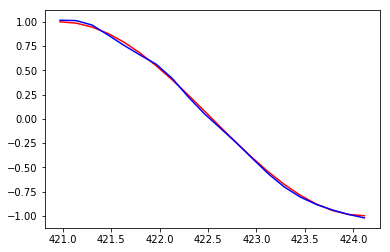

c [[[-0.9891746 ]
  [-0.9988028 ]
  [-0.9731128 ]
  [-0.8931447 ]
  [-0.77638644]
  [-0.6711863 ]
  [-0.56098926]
  [-0.41353977]
  [-0.23180982]
  [-0.08285508]
  [ 0.0695866 ]
  [ 0.2528099 ]
  [ 0.42201605]
  [ 0.55684197]
  [ 0.6649517 ]
  [ 0.75790703]
  [ 0.84240234]
  [ 0.92022586]
  [ 0.9896407 ]
  [ 1.0453157 ]]]
epoch:135  | loss:0.0003940904571209103  


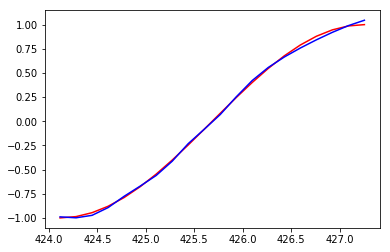

c [[[ 1.0151671 ]
  [ 1.0112977 ]
  [ 0.9654534 ]
  [ 0.86357427]
  [ 0.75799143]
  [ 0.66030324]
  [ 0.56652784]
  [ 0.4225603 ]
  [ 0.23461762]
  [ 0.06491989]
  [-0.08258632]
  [-0.23103854]
  [-0.3907678 ]
  [-0.55021787]
  [-0.6886198 ]
  [-0.7952986 ]
  [-0.8732805 ]
  [-0.9318204 ]
  [-0.978596  ]
  [-1.0149826 ]]]
epoch:136  | loss:0.00025102385552600026  


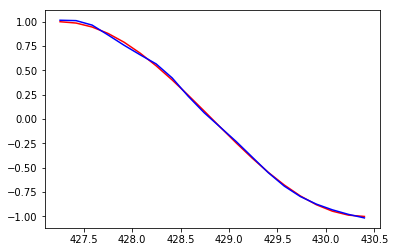

c [[[-0.9807563 ]
  [-0.98927855]
  [-0.9626553 ]
  [-0.8828362 ]
  [-0.76849055]
  [-0.665867  ]
  [-0.55687666]
  [-0.4104936 ]
  [-0.22981536]
  [-0.08153668]
  [ 0.06970388]
  [ 0.25225255]
  [ 0.42162767]
  [ 0.5568249 ]
  [ 0.665184  ]
  [ 0.7582307 ]
  [ 0.8426938 ]
  [ 0.9204111 ]
  [ 0.9896525 ]
  [ 1.0451274 ]]]
epoch:137  | loss:0.000375337345758453  


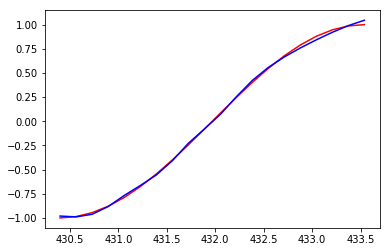

c [[[ 1.0148722 ]
  [ 1.010971  ]
  [ 0.9654052 ]
  [ 0.8644215 ]
  [ 0.7602279 ]
  [ 0.6635089 ]
  [ 0.570032  ]
  [ 0.42716774]
  [ 0.2412121 ]
  [ 0.07375887]
  [-0.07154694]
  [-0.21796563]
  [-0.37622297]
  [-0.535632  ]
  [-0.67550373]
  [-0.7843244 ]
  [-0.8642422 ]
  [-0.9240918 ]
  [-0.97149277]
  [-1.0078939 ]]]
epoch:138  | loss:0.00032051841844804585  


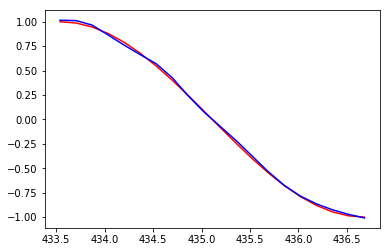

c [[[-0.97686756]
  [-0.9854617 ]
  [-0.95876336]
  [-0.8794874 ]
  [-0.7666754 ]
  [-0.66513675]
  [-0.5565223 ]
  [-0.4106684 ]
  [-0.2302053 ]
  [-0.08166176]
  [ 0.06841171]
  [ 0.25028557]
  [ 0.420143  ]
  [ 0.5560789 ]
  [ 0.6649608 ]
  [ 0.7582648 ]
  [ 0.84277403]
  [ 0.9203665 ]
  [ 0.9893714 ]
  [ 1.0444885 ]]]
epoch:139  | loss:0.0003748695307876915  


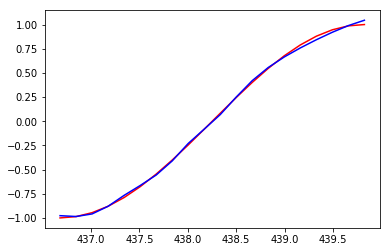

c [[[ 1.0136701 ]
  [ 1.0090641 ]
  [ 0.9625782 ]
  [ 0.86149836]
  [ 0.7575307 ]
  [ 0.65953314]
  [ 0.56214046]
  [ 0.4132171 ]
  [ 0.22234383]
  [ 0.0509533 ]
  [-0.0988059 ]
  [-0.2500381 ]
  [-0.41191036]
  [-0.57124114]
  [-0.70730376]
  [-0.81081295]
  [-0.8859941 ]
  [-0.9425411 ]
  [-0.98810315]
  [-1.0239183 ]]]
epoch:140  | loss:0.00037497610901482403  


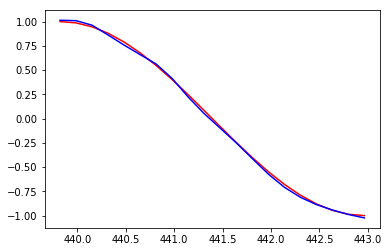

c [[[-0.9898187 ]
  [-0.99916434]
  [-0.9734422 ]
  [-0.893824  ]
  [-0.77729136]
  [-0.6717635 ]
  [-0.56193995]
  [-0.41616616]
  [-0.23482871]
  [-0.08441579]
  [ 0.06526357]
  [ 0.24704507]
  [ 0.4178758 ]
  [ 0.55489004]
  [ 0.66449606]
  [ 0.7581732 ]
  [ 0.84280336]
  [ 0.92034173]
  [ 0.98916864]
  [ 1.0440164 ]]]
epoch:141  | loss:0.0003822939470410347  


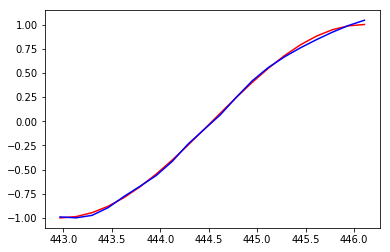

c [[[ 1.0134797 ]
  [ 1.0086789 ]
  [ 0.9626672 ]
  [ 0.8627703 ]
  [ 0.7604557 ]
  [ 0.6640973 ]
  [ 0.568621  ]
  [ 0.4233774 ]
  [ 0.23678666]
  [ 0.06941286]
  [-0.07641906]
  [-0.22391653]
  [-0.38316265]
  [-0.54274   ]
  [-0.6819422 ]
  [-0.78975546]
  [-0.86875427]
  [-0.9279236 ]
  [-0.9748647 ]
  [-1.0109813 ]]]
epoch:142  | loss:0.0002501684066373855  


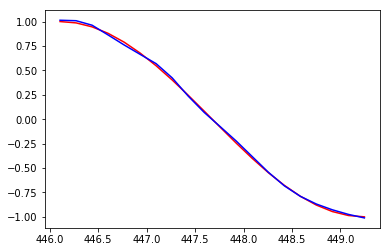

c [[[-0.97713745]
  [-0.9850745 ]
  [-0.957955  ]
  [-0.87846196]
  [-0.7655101 ]
  [-0.66370827]
  [-0.55497134]
  [-0.4095411 ]
  [-0.2291157 ]
  [-0.07988781]
  [ 0.06889957]
  [ 0.24983737]
  [ 0.42015138]
  [ 0.55687654]
  [ 0.6662818 ]
  [ 0.7597635 ]
  [ 0.8441855 ]
  [ 0.9214989 ]
  [ 0.99009085]
  [ 1.0447023 ]]]
epoch:143  | loss:0.0003647834528237581  


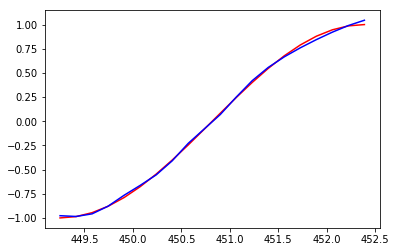

c [[[ 1.0138943 ]
  [ 1.0090551 ]
  [ 0.96313226]
  [ 0.863781  ]
  [ 0.76227605]
  [ 0.6660083 ]
  [ 0.5696141 ]
  [ 0.4237314 ]
  [ 0.237338  ]
  [ 0.07043186]
  [-0.07506746]
  [-0.22236086]
  [-0.38149238]
  [-0.5410916 ]
  [-0.6804714 ]
  [-0.7885398 ]
  [-0.8677647 ]
  [-0.92706084]
  [-0.97400737]
  [-1.0099785 ]]]
epoch:144  | loss:0.0002551300567574799  


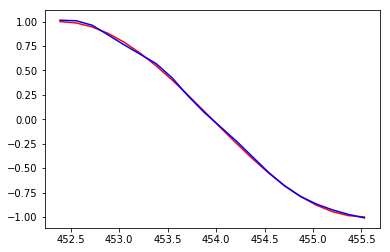

c [[[-0.9789516 ]
  [-0.9874457 ]
  [-0.96068275]
  [-0.8815056 ]
  [-0.7685689 ]
  [-0.6662594 ]
  [-0.5570209 ]
  [-0.4112216 ]
  [-0.23003665]
  [-0.07965118]
  [ 0.06895465]
  [ 0.24956498]
  [ 0.4201561 ]
  [ 0.55731845]
  [ 0.66700447]
  [ 0.7605865 ]
  [ 0.8449559 ]
  [ 0.92209446]
  [ 0.9904071 ]
  [ 1.0446261 ]]]
epoch:145  | loss:0.00034935944131575525  


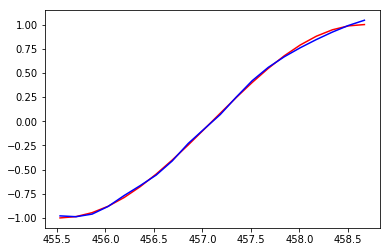

c [[[ 1.0132235 ]
  [ 1.0076811 ]
  [ 0.9609386 ]
  [ 0.8614813 ]
  [ 0.7600267 ]
  [ 0.6623462 ]
  [ 0.5622774 ]
  [ 0.4110372 ]
  [ 0.22029161]
  [ 0.04964179]
  [-0.10019511]
  [-0.25211853]
  [-0.41464674]
  [-0.5741582 ]
  [-0.7100161 ]
  [-0.8132158 ]
  [-0.88812405]
  [-0.94444704]
  [-0.9897798 ]
  [-1.0253218 ]]]
epoch:146  | loss:0.0003968431265093386  


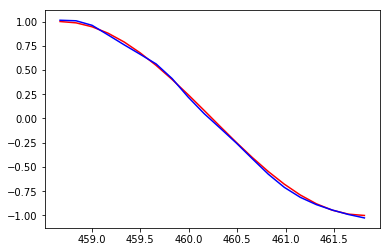

c [[[-0.9902755 ]
  [-0.99926865]
  [-0.97327113]
  [-0.89373076]
  [-0.77762306]
  [-0.67200863]
  [-0.5616566 ]
  [-0.41559395]
  [-0.23340493]
  [-0.08119041]
  [ 0.06782514]
  [ 0.24864575]
  [ 0.4198155 ]
  [ 0.557533  ]
  [ 0.667549  ]
  [ 0.7612549 ]
  [ 0.8456135 ]
  [ 0.92262757]
  [ 0.9907434 ]
  [ 1.044717  ]]]
epoch:147  | loss:0.00035899621434509754  


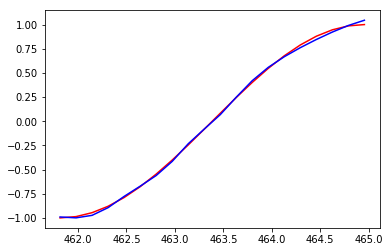

c [[[ 1.0135483 ]
  [ 1.0080321 ]
  [ 0.9620888 ]
  [ 0.86395323]
  [ 0.76423144]
  [ 0.6686386 ]
  [ 0.571638  ]
  [ 0.4260603 ]
  [ 0.24130139]
  [ 0.07600045]
  [-0.06845002]
  [-0.21505119]
  [-0.3737512 ]
  [-0.5335258 ]
  [-0.6738033 ]
  [-0.7831198 ]
  [-0.8634944 ]
  [-0.9236046 ]
  [-0.970984  ]
  [-1.0070806 ]]]
epoch:148  | loss:0.000314408156555146  


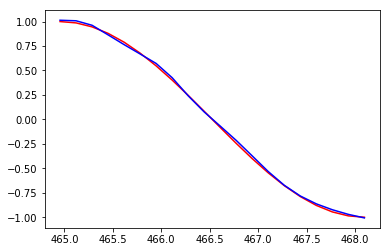

c [[[-0.9741626 ]
  [-0.98179734]
  [-0.9544076 ]
  [-0.8754276 ]
  [-0.764109  ]
  [-0.66319597]
  [-0.55419314]
  [-0.40846682]
  [-0.227287  ]
  [-0.07646441]
  [ 0.0717212 ]
  [ 0.25170615]
  [ 0.4222537 ]
  [ 0.55957377]
  [ 0.66930866]
  [ 0.7627766 ]
  [ 0.8468902 ]
  [ 0.9236603 ]
  [ 0.99152315]
  [ 1.0452448 ]]]
epoch:149  | loss:0.000359686731826514  


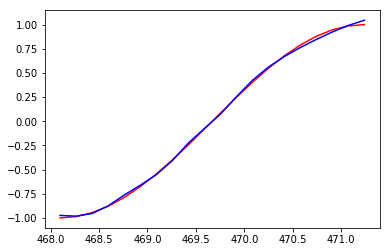

In [151]:
optimizer = optim.Adam(rnn.parameters(), lr = 0.02)
loss_function = nn.MSELoss()
h_state = torch.empty(1,1,32)
c_state = torch.empty(1,1,32)
plt.figure(1, figsize=(12, 5))
plt.ion()   
for epoch in range(150):
    start, end = epoch*np.pi, (epoch+1)*np.pi
    steps = np.linspace(start, end, 20 , dtype=np.float32)
    x_np = np.sin(steps)
    y_np = np.cos(steps)
#     print(x_np.shape)
    x = torch.from_numpy(x_np[np.newaxis, :, np.newaxis])
    x.requires_grad =True
    y = torch.from_numpy(y_np[np.newaxis, :, np.newaxis])
#     h_state = Variable(h_state.data)
    if torch.cuda.is_available():
        x = x.cuda()
        y = y.cuda()
        h_state= h_state.cuda()
        c_state = c_state.cuda()
    losses = 0
    optimizer.zero_grad()
    out, h_state, c_state = rnn(x, (h_state, c_state))
    losses = loss_function(out, y)
    losses.backward(retain_graph=True)
    optimizer.step()

    print("epoch:{}  | loss:{}  ".format(epoch,losses))
    plt.plot(steps, y_np.flatten(), 'r-')
    plt.plot(steps, out.cpu().data.numpy().flatten(), 'b-')
    plt.draw(); plt.pause(0.05)